<a href="https://codeimmersives.com"><img src = "https://www.codeimmersives.com/wp-content/uploads/2019/09/CodeImmersives_Logo_RGB_NYC_BW.png" width = 400> </a>


<h1 align=center><font size = 5>Agenda</font></h1>

In [1353]:
'''
You are a consulting firm tasked to examine the hiring practice of a division of a public company.
You are given the HR records of all past and present employees.  A complaint has been filed that this division
discriminates against women and low wage workers.  Examine the data and come up with a conclusion.
The output should be in a jupyter notebook with the following name:
Lastname_firstname_DATASCIENCE_CAPSTONE_202106
Each answer should have a clear label of what you are answering using markdown
Part 1-a
1 - Import employee file only the gender,salarly grade and dept columns
2 - Fix the column dept capitalize it
3 - Create a dataframe for every salary grade (index) with columns 'Male' and 'Female'
4 - Create pie charts for every Salary Grade with the ratio of men to women
5 - Create a dataframe for every Dept (index) with columns 'Male' and 'Female'
6 - Create pie charts for every Dept with the ratio of men to women
NOTE - All charts should be automated
Part 1-b
1 - Import employee file all columns
2 - Fix the case on the last name
3 - Create a field call Name which has the lastname, First name MI
4 - Create a alphabetic list of employees by last name, first name (Name)
5 - Create a alphabetic list of employees by last name, first name (Name) for each dept
6 - Create a horizontal bar chart with the number of employees per dept
Part 2 - a
1 - Remove the NaN from the mi
2 - Import the dept_CAPSTONE.txt file
3 - Make the deptCode all caps
4 - Remove the non alpha characters in the dept name
5 - Make the dept name each word initial caps
6 - Combine the emp_file and the dept_file and join both tables on dept code
7 - Create a file called ACTIVE_EMPLOYEES_BY_DEPT. Print list of all employees by dept by hire date (Descending order)
	with terminated employees eliminated
8 - Create a histogram that shows a count of the number of employees per dept by years employed
Part 2 - b - SALARY ANALYSIS
NOTE: A normal distribution has the following attributes:
68% within 1 standard deviation, 95% within 2 STD, 99% within 3 STD
1 - Decode the salaries column
2 - Create a histogram of all salaries in deciles
3 - Calculate the mean, mode, median, and standard deviation of the salaries
4 - Is the salary distribution a normal distribution?
5 - Calculate the mean, mode, median, and standard deviation of the salaries of men
6 - Calculate the mean, mode, median, and standard deviation of the salaries of women
7 - Is the standard deviation, mean, mode, median higher for men? Calulate the % difference
8 - Write up- Do you think there is salary bias?
Part 2 - c
The salary grades of 5 - 7 are considered executive salary grades - Exempt or EXECUTIVE
The salary grades of 1 - 4 are considered - Non-exempt (Hourly) - NON-EXECUTIVE
1 - create a new column called 'Status' Label each employee record in alpha order by name as EXEMPT or NON-EXEMPT
2 - Calculate the mean, mode, median, and standard deviation of the salaries of each salary grade
3 - Calculate the mean, mode, median, and standard deviation of the salaries of EXEMPT employees
4 - Calculate the mean, mode, median, and standard deviation of the salaries of NON-EXEMPT employees
5 - Create pie charts of the employee status of EXEMPT count by gender and NON-EXEMPT count by gender
6 - Create scatter plots of salary grade by mean salary
7 - Create a scatter plots of salary grade by mean salary for men
8 - Create a scatter plots of salary grade by mean salary for women
9 - Create a horizontal bar chart of EXEMPT employees by mean salary for men and women (1 chart)
10- Create a horizontal bar chart of NON-EXEMPT employees by mean salary for men and women (1 chart)
7 - Sort and output every Employee all columns by salary grade by name for every salary grade
Part 3a - Create employee Id
To construct the employee id for everyone use the following formula
First 3 letters of the last name + first 3 letters of the last name + a random 3 digit number from (1 - 99)
For example the employee name is Kevin Smith id = 'SMIKEV07'
In the case of people with the same last name and first name generate a new number
No duplication
1 - List all employees in employee id order
Part 3b -Raises
1 - Import the file raises_CAPSTONE.txt
2 - The rules for giving a raise are in the file but be careful of the order that your run the raise
3 - Based on each employees salary calculate 2 fields 'Raise_Amount' and 'New_Salary'
4 - Calculate the total salary for each dept
5 - Chart the total salary for each dept in 1 bar chart
6 - Create a pie chart that shows the percentage that each dept has of the total money allocated for raises
7 - Create a pie chart to show the percent of men vs women for the raise money allocated
8 - Create a pie chart to show the percent of men vs women for the raise money allocated by dept
9 - Create a dataframe for promotions.  If the persons salary excedes the salary max for their salary grade. create a column
called 'Promotion' and add the string 'PROMOTION DUE' otherwise leave blank
Part 4 - Analysis
1 - Write about any conclusions you drew from the data.
2 - Are there any additional charts or analysis you could include to bolster your conclusions
'''

"\nYou are a consulting firm tasked to examine the hiring practice of a division of a public company.\nYou are given the HR records of all past and present employees.  A complaint has been filed that this division\ndiscriminates against women and low wage workers.  Examine the data and come up with a conclusion.\nThe output should be in a jupyter notebook with the following name:\nLastname_firstname_DATASCIENCE_CAPSTONE_202106\nEach answer should have a clear label of what you are answering using markdown\nPart 1-a\n1 - Import employee file only the gender,salarly grade and dept columns\n2 - Fix the column dept capitalize it\n3 - Create a dataframe for every salary grade (index) with columns 'Male' and 'Female'\n4 - Create pie charts for every Salary Grade with the ratio of men to women\n5 - Create a dataframe for every Dept (index) with columns 'Male' and 'Female'\n6 - Create pie charts for every Dept with the ratio of men to women\nNOTE - All charts should be automated\nPart 1-b\n1 -

# SET UP SECTION 
Add your set up directory here

In [1354]:
import pandas as pd
import numpy as np
import statistics as stats
import math
import matplotlib.pyplot as plt

<h2>Part 1-a</h2>
1 - Import employee file only the gender,salarly grade and dept columns

In [1355]:
emp_data = pd.read_csv('/Users/coreysteimel/code-imm-400/capstone/emp_file_CAPSTONE.txt', sep=',')
emp_data = emp_data[['gender','sg','dept']]
emp_data.head()
                    


,gender,sg,dept
0,F,1,hr
1,M,1,comp
2,M,4,fin
3,M,7,comp
4,M,7,proj


2 - Fix the column dept capitalize it

In [1356]:
emp_data['Dept'] = emp_data['dept'].str.title()
emp_data.pop('dept')
emp_data.head()

,gender,sg,Dept
0,F,1,Hr
1,M,1,Comp
2,M,4,Fin
3,M,7,Comp
4,M,7,Proj


3 - Create a dataframe for every salary grade (index) with columns 'Male' and 'Female'

In [1357]:
sg_jesse = emp_data[['sg', 'gender']]
sg_jesse = sg_jesse.set_index('sg')
sg_jesse = sg_jesse.groupby('sg')['gender'].value_counts().unstack()
sg_jesse.rename(columns={'F': 'Female', 'M': 'Male'},inplace=True)
sg_jesse

gender,Female,Male
sg,,
1,22,65
2,26,68
3,32,70
4,22,81
5,34,54
6,34,58
7,31,81


In [1358]:
sg_leah = pd.DataFrame().assign(SG = emp_data['sg'], Gender = emp_data['gender'])
sg_leah_pivot = sg_leah.pivot_table(index='SG', columns='Gender', aggfunc=len, fill_value=0)
sg_leah_pivot

Gender,F,M
SG,,
1,22,65
2,26,68
3,32,70
4,22,81
5,34,54
6,34,58
7,31,81


In [1359]:
sg_cats = emp_data['sg'].unique()
sg_cats
sg_data = pd.DataFrame(columns=['Male', 'Female'])
sg_data.index.name = 'SG'
sg_data.columns.name = 'Gender'
for i in sg_cats:
    male_count = emp_data.loc[(emp_data['sg'] == i) & (emp_data['gender'] == 'M')]
    male_count = male_count['gender'].value_counts()['M']
    female_count = emp_data.loc[(emp_data['sg'] == i) & (emp_data['gender'] == 'F')]
    female_count = female_count['gender'].value_counts()['F']
    sg_data.loc[i]=[male_count, female_count]
sg_data = sg_data.sort_index()
sg_data



Gender,Male,Female
SG,,
1,65,22
2,68,26
3,70,32
4,81,22
5,54,34
6,58,34
7,81,31


4 - Create pie charts for every Salary Grade with the ratio of men to women

In [1360]:
sg_data['Male Percent'] = round(sg_data['Male']/(sg_data['Male']+sg_data['Female']),2)
sg_data['Female Percent'] = round(sg_data['Female']/(sg_data['Male']+sg_data['Female']),2)
sg_data

Gender,Male,Female,Male Percent,Female Percent
SG,,,,
1,65,22,0.75,0.25
2,68,26,0.72,0.28
3,70,32,0.69,0.31
4,81,22,0.79,0.21
5,54,34,0.61,0.39
6,58,34,0.63,0.37
7,81,31,0.72,0.28


/var/folders/dr/dnghq6r96vdfqhr_t9n_5pg00000gn/T/ipykernel_7560/1859687574.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 3, n + 1)


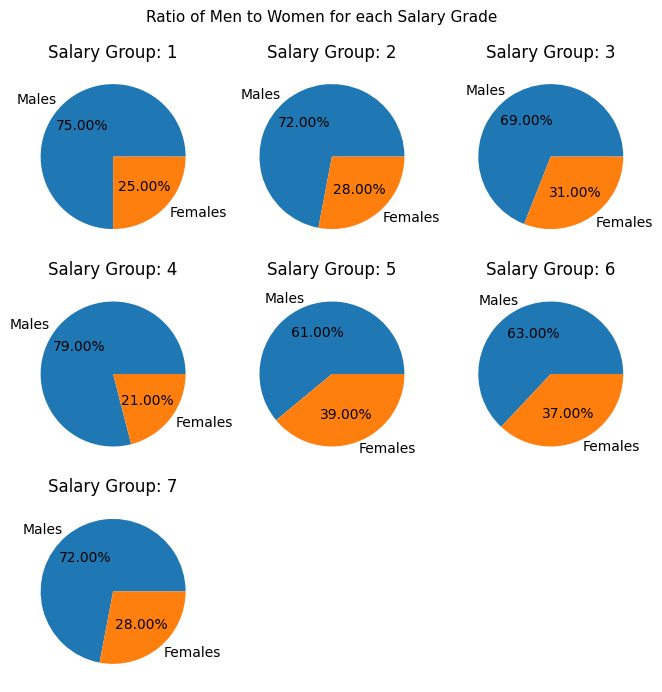

In [1361]:
sg_labels = ['Males', 'Females']
fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle("Ratio of Men to Women for each Salary Grade", fontsize=11, y=0.95)
for n in range(len(sg_data)):
    ax = plt.subplot(3, 3, n + 1)
    sg_percent = sg_data.loc[n+1, ['Male Percent','Female Percent']].values.flatten().tolist()
    sg_group = str(n+1)
    ax.set_title(f'Salary Group: {sg_group}')
    ax.pie(sg_percent, labels=sg_labels,  autopct = '%1.2f%%')
plt.show()


5 - Create a dataframe for every Dept (index) with columns 'Male' and 'Female'

In [1362]:
dept_cats = emp_data['Dept'].unique()
dept_data = pd.DataFrame(columns=['Male', 'Female'])
dept_data.index.name = 'Dept'
dept_data.columns.name = 'Gender'
for i in dept_cats:
    male_count = emp_data.loc[(emp_data['Dept'] == i) & (emp_data['gender'] == 'M')]
    male_count = male_count['gender'].value_counts()['M']
    female_count = emp_data.loc[(emp_data['Dept'] == i) & (emp_data['gender'] == 'F')]
    female_count = female_count['gender'].value_counts()['F']
    dept_data.loc[i]=[male_count, female_count]
dept_data

Gender,Male,Female
Dept,,
Hr,67,29
Comp,73,31
Fin,67,31
Proj,65,21
Acc,60,28
I.T.,84,29
Pub,61,32


6 - Create pie charts for every Dept with the ratio of men to women

In [1363]:
dept_data['Male Percent'] = round(dept_data['Male']/(dept_data['Male']+dept_data['Female']),2)
dept_data['Female Percent'] = round(dept_data['Female']/(dept_data['Male']+dept_data['Female']),2)
dept_data

Gender,Male,Female,Male Percent,Female Percent
Dept,,,,
Hr,67,29,0.70,0.30
Comp,73,31,0.70,0.30
Fin,67,31,0.68,0.32
Proj,65,21,0.76,0.24
Acc,60,28,0.68,0.32
I.T.,84,29,0.74,0.26
Pub,61,32,0.66,0.34


/var/folders/dr/dnghq6r96vdfqhr_t9n_5pg00000gn/T/ipykernel_7560/3349888565.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 3, n + 1)


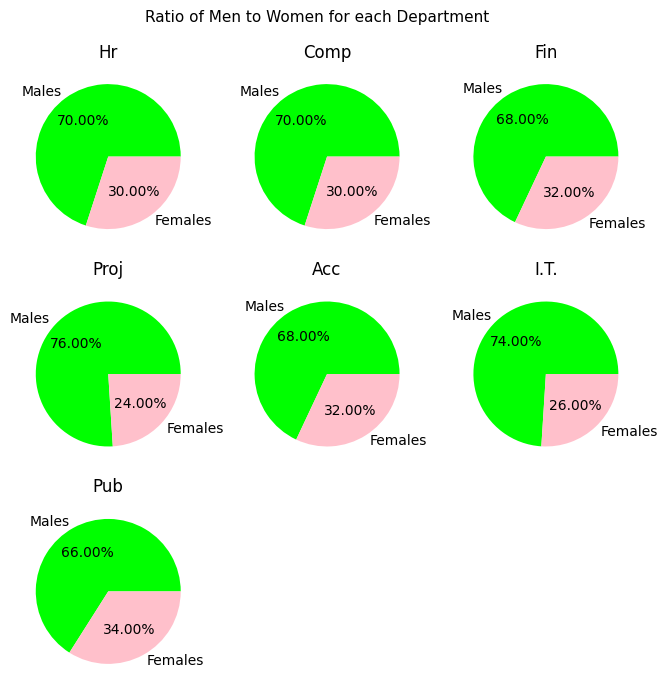

In [1364]:
dept_data['Male Percent'] = round(dept_data['Male']/(dept_data['Male']+dept_data['Female']),2)
dept_data['Female Percent'] = round(dept_data['Female']/(dept_data['Male']+dept_data['Female']),2)
dept_labels = ['Males', 'Females']
fig, ax = plt.subplots(figsize=(8,8))
dept_labels
fig.suptitle("Ratio of Men to Women for each Department", fontsize=11, y=0.95)
for n in range(len(dept_data)):
    ax = plt.subplot(3, 3, n + 1)
    dept_percent = dept_data.loc[dept_cats[n], ['Male Percent','Female Percent']].values.flatten().tolist()
    dept_name = dept_cats[n]
    ax.set_title(dept_name)
    ax.pie(dept_percent, labels=dept_labels,  autopct = '%1.2f%%', colors=['lime', 'pink'])
plt.show()

<h2>Part 1-b</h2>
1 - Import employee file all columns

In [1365]:
emp_data_all = pd.read_csv('/Users/coreysteimel/code-imm-400/capstone/emp_file_CAPSTONE.txt', sep=',')
emp_data_all.head()

,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate
0,Madison,WILTON,W,F,1,$77582,hr,11/22/2015,
1,James,SMITH,A,M,1,38136,comp,1/17/2018,
2,John,JOHNSON,NaN,M,4,107483,fin,6/2/2017,
3,Robert,WILLIAMS,W,M,7,3X429110,comp,11/25/2013,
4,Michael,BROWN,J,M,7,3X646818,proj,1/20/2012,


2 - Fix the case on the last name

In [1366]:
emp_data_all['ln'] = emp_data_all['ln'].str.title()
emp_data_all

,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate
0,Madison,Wilton,W,F,1,$77582,hr,11/22/2015,
1,James,Smith,A,M,1,38136,comp,1/17/2018,
2,John,Johnson,NaN,M,4,107483,fin,6/2/2017,
3,Robert,Williams,W,M,7,3X429110,comp,11/25/2013,
4,Michael,Brown,J,M,7,3X646818,proj,1/20/2012,
...,...,...,...,...,...,...,...,...,...
673,Lawrence,Rubio,NaN,M,6,3X499553,acc,11/14/2011,
674,Austin,Choi,NaN,M,4,114045,hr,6/10/2017,
675,Joe,Huffman,G,M,1,33030,comp,3/22/2016,
676,Noah,Boyer,F,M,2,51120,proj,10/8/2017,


3 - Create a field call Name which has the lastname, First name MI

In [1367]:
emp_data_all['mi'] = emp_data_all['mi'].fillna('')
emp_data_all['Name'] = emp_data_all['ln'].map(str) + ', ' + emp_data_all['fn'].map(str) + ' ' + emp_data_all['mi'].map(str)
emp_data_all

,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate,Name
0,Madison,Wilton,W,F,1,$77582,hr,11/22/2015,,"Wilton, Madison W"
1,James,Smith,A,M,1,38136,comp,1/17/2018,,"Smith, James A"
2,John,Johnson,,M,4,107483,fin,6/2/2017,,"Johnson, John"
3,Robert,Williams,W,M,7,3X429110,comp,11/25/2013,,"Williams, Robert W"
4,Michael,Brown,J,M,7,3X646818,proj,1/20/2012,,"Brown, Michael J"
...,...,...,...,...,...,...,...,...,...,...
673,Lawrence,Rubio,,M,6,3X499553,acc,11/14/2011,,"Rubio, Lawrence"
674,Austin,Choi,,M,4,114045,hr,6/10/2017,,"Choi, Austin"
675,Joe,Huffman,G,M,1,33030,comp,3/22/2016,,"Huffman, Joe G"
676,Noah,Boyer,F,M,2,51120,proj,10/8/2017,,"Boyer, Noah F"


4 - Create a alphabetic list of employees by last name, first name (Name)

In [1368]:
emp_data_all = emp_data_all.sort_values(by=['Name'])
emp_name_lst = emp_data_all['Name'].tolist()
emp_name_lst

['Abbott, Raymond ',
 'Acevedo, Keith A',
 'Acosta, Patricia ',
 'Adams, Benjamin ',
 'Adkins, Dennis ',
 'Aguilar, Shirley J',
 'Aguirre, James ',
 'Alexander, Kimberly F',
 'Ali, Zachary ',
 'Allen, Nicholas ',
 'Allison, Patrick G',
 'Alvarado, Andrew ',
 'Alvarez, Logan G',
 'Anderson, Donald ',
 'Andrade, Mark F',
 'Andrews, Steven F',
 'Anthony, Steven F',
 'Arias, Bruce ',
 'Armstrong, Matthew ',
 'Arnold, James ',
 'Atkins, Harold P',
 'Atkinson, Larry J',
 'Austin, Jose J',
 'Avila, Kimberly ',
 'Ayala, Amy F',
 'Bailey, Sean F',
 'Baker, Samuel ',
 'Baldwin, Natalie G',
 'Ball, Joseph A',
 'Ballard, Samuel ',
 'Banks, Logan ',
 'Barber, David G',
 'Barker, Evelyn G',
 'Barnes, Karen A',
 'Barnett, Melissa W',
 'Barrera, Jerry P',
 'Barrett, Betty A',
 'Barron, Adam G',
 'Barton, Roy F',
 'Bass, Juan F',
 'Bates, Deborah ',
 'Bauer, Paul ',
 'Bautista, Nathan ',
 'Beck, Laura ',
 'Becker, Kelly A',
 'Beil, Keith ',
 'Bell, Barbara F',
 'Benitez, Roger F',
 'Bennett, Ralph W',


5 - Create a alphabetic list of employees by last name, first name (Name) for each dept

In [1369]:
emp_data_all['dept'] = emp_data_all['dept'].str.title()
emp_data_all_dept_groups = emp_data_all.groupby(['dept'])['Name'].apply(list)
emp_data_all_dept_groups
# emp_data_all_dept_groups.to_list()


dept
Acc     [Andrews, Steven F, Anthony, Steven F, Arnold,...
Comp    [Adams, Benjamin , Ali, Zachary , Atkins, Haro...
Fin     [Aguilar, Shirley J, Anderson, Donald , Armstr...
Hr      [Acevedo, Keith A, Acosta, Patricia , Andrade,...
I.T.    [Adkins, Dennis , Allen, Nicholas , Alvarez, L...
Proj    [Aguirre, James , Allison, Patrick G, Alvarado...
Pub     [Abbott, Raymond , Alexander, Kimberly F, Ball...
Name: Name, dtype: object

6 - Create a horizontal bar chart with the number of employees per dept

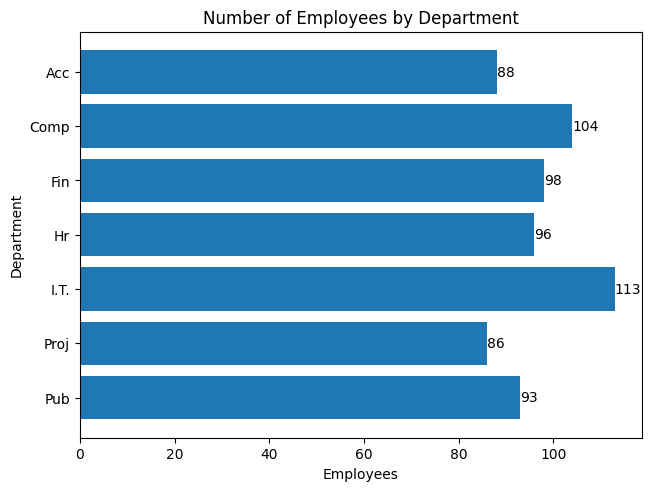

In [1370]:
y = emp_data_all_dept_groups.keys().to_list()
x = [len(x) for x in emp_data_all_dept_groups.to_list()]
num_emp_df = pd.DataFrame({'Dept': y, 'Employees': x})
fig_num_emp, ax_num_emp = plt.subplots(layout="constrained")
bars = ax_num_emp.barh(y,x)
ax_num_emp.invert_yaxis()
ax_num_emp.set_ylabel('Department')
ax_num_emp.set_xlabel('Employees')
ax_num_emp.set_title('Number of Employees by Department')
ax_num_emp.bar_label(bars)
plt.show()


<h2>Part 2 - a</h2>
1 - Remove the NaN from the mi

In [1371]:
# I have already removed NaN from mi in Part 1 - b #3
# emp_data_all['mi'] = emp_data_all['mi'].fillna('')
emp_data_all

,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate,Name
645,Raymond,Abbott,,M,7,3X654139,Pub,12/28/2002,,"Abbott, Raymond"
665,Keith,Acevedo,A,M,6,3X406173,Hr,5/6/2007,,"Acevedo, Keith A"
302,Patricia,Acosta,,F,2,58475,Hr,3/5/2018,,"Acosta, Patricia"
42,Benjamin,Adams,,M,2,67712,Comp,3/21/2015,,"Adams, Benjamin"
449,Dennis,Adkins,,M,4,111088,I.T.,5/1/2017,,"Adkins, Dennis"
...,...,...,...,...,...,...,...,...,...,...
540,Brandon,Zamora,,M,6,3X410395,Proj,10/6/2014,,"Zamora, Brandon"
667,Gerald,Zavala,J,M,5,132100,Proj,6/9/2014,,"Zavala, Gerald J"
472,Sean,Zhang,W,M,6,3X534783,Proj,1/11/2005,6/6/2006,"Zhang, Sean W"
379,Janice,Zimmerman,,F,5,125626,Fin,3/2/2012,,"Zimmerman, Janice"


2 - Import the dept_CAPSTONE.txt file

In [1372]:
dept_data_all = pd.read_csv('/Users/coreysteimel/code-imm-400/capstone/dept_CAPSTONE.txt', sep=',')
dept_data_all

,'deptCode','dept name'
0,'fin','Finance'
1,'acc','Acco0unting'
2,'pub','Public Relations'
3,'hr','Human resou0rses$'
4,'comp','Lega@l and Compliance'
5,'proj','Project Management'
6,'I.T.','Informa1tion Technology'


3 - Make the deptCode all caps

In [1373]:
dept_data_all['\'deptCode\''] = dept_data_all['\'deptCode\''].str.upper()
dept_data_all

,'deptCode','dept name'
0,'FIN','Finance'
1,'ACC','Acco0unting'
2,'PUB','Public Relations'
3,'HR','Human resou0rses$'
4,'COMP','Lega@l and Compliance'
5,'PROJ','Project Management'
6,'I.T.','Informa1tion Technology'


4 - Remove the non alpha characters in the dept name

In [1374]:
dept_names = dept_data_all['\'dept name\''].to_list()
dept_names_mod = [["".join(c for c in i if c.isalpha() or c == ' ')][0] for i in dept_names]
dept_data_all['\'dept name\''] = dept_names_mod
dept_data_all


,'deptCode','dept name'
0,'FIN',Finance
1,'ACC',Accounting
2,'PUB',Public Relations
3,'HR',Human resourses
4,'COMP',Legal and Compliance
5,'PROJ',Project Management
6,'I.T.',Information Technology


5 - Make the dept name each word initial caps

In [1375]:
dept_data_all['\'dept name\''] = dept_data_all['\'dept name\''].str.title()
dept_data_all


,'deptCode','dept name'
0,'FIN',Finance
1,'ACC',Accounting
2,'PUB',Public Relations
3,'HR',Human Resourses
4,'COMP',Legal And Compliance
5,'PROJ',Project Management
6,'I.T.',Information Technology


6 - Combine the emp_file and the dept_file and join both tables on dept code

In [1376]:
emp_data_all = emp_data_all.rename({'dept': 'deptCode'}, axis=1)
emp_data_all['deptCode'] = emp_data_all['deptCode'].str.upper()
dept_data_all = dept_data_all.rename({'\'deptCode\'' : 'deptCode', '\'dept name\'': 'dept name'}, axis=1)
dept_data_all['deptCode'] = dept_data_all['deptCode'].str.replace("'", '')
emp_data_all_join_dept_data = emp_data_all.join(dept_data_all.set_index('deptCode'), on='deptCode')
emp_data_all_join_dept_data

,fn,ln,mi,gender,sg,salary,deptCode,hiredate,termdate,Name,dept name
645,Raymond,Abbott,,M,7,3X654139,PUB,12/28/2002,,"Abbott, Raymond",Public Relations
665,Keith,Acevedo,A,M,6,3X406173,HR,5/6/2007,,"Acevedo, Keith A",Human Resourses
302,Patricia,Acosta,,F,2,58475,HR,3/5/2018,,"Acosta, Patricia",Human Resourses
42,Benjamin,Adams,,M,2,67712,COMP,3/21/2015,,"Adams, Benjamin",Legal And Compliance
449,Dennis,Adkins,,M,4,111088,I.T.,5/1/2017,,"Adkins, Dennis",Information Technology
...,...,...,...,...,...,...,...,...,...,...,...
540,Brandon,Zamora,,M,6,3X410395,PROJ,10/6/2014,,"Zamora, Brandon",Project Management
667,Gerald,Zavala,J,M,5,132100,PROJ,6/9/2014,,"Zavala, Gerald J",Project Management
472,Sean,Zhang,W,M,6,3X534783,PROJ,1/11/2005,6/6/2006,"Zhang, Sean W",Project Management
379,Janice,Zimmerman,,F,5,125626,FIN,3/2/2012,,"Zimmerman, Janice",Finance


7 - Create a file called ACTIVE_EMPLOYEES_BY_DEPT. Print list of all employees by dept by hire date (Descending order)
	with terminated employees eliminated

In [1377]:
emp_data_dept_data_rm_term = emp_data_all_join_dept_data.copy()
emp_data_dept_data_rm_term['termdate'] = emp_data_dept_data_rm_term['termdate'].str.strip()
index_termdates = emp_data_dept_data_rm_term[ (emp_data_dept_data_rm_term['termdate'] !=  '')].index
emp_data_dept_data_rm_term.drop(index_termdates, inplace = True)
emp_data_dept_data_rm_term['hiredate'] = pd.to_datetime(emp_data_dept_data_rm_term['hiredate']).dt.date
emp_data_dept_data_rm_term = emp_data_dept_data_rm_term.groupby('dept name').apply(lambda x: x.sort_values('hiredate', ascending=False))[['dept name', 'Name', 'hiredate']].reset_index(drop=True)
emp_data_dept_data_rm_term
emp_data_dept_data_rm_term.to_csv('ACTIVE_EMPLOYEES_BY_DEPT.csv')
act_emp = pd.read_csv('/Users/coreysteimel/code-imm-400/capstone/ACTIVE_EMPLOYEES_BY_DEPT.csv', sep=',')
act_emp

,Unnamed: 0,dept name,Name,hiredate
0,0,Accounting,"Campbell, Alexander A",2018-12-30
1,1,Accounting,"Simon, Alexis W",2018-11-26
2,2,Accounting,"Flynn, Eric J",2018-09-06
3,3,Accounting,"Morgan, Arthur W",2018-08-15
4,4,Accounting,"Gates, Jack",2017-12-20
...,...,...,...,...
612,612,Public Relations,"Leon, Olivia",2003-07-02
613,613,Public Relations,"Lyons, Hannah",2003-01-16
614,614,Public Relations,"Hammond, Bruce",2002-12-29
615,615,Public Relations,"Abbott, Raymond",2002-12-28


8 - Create a histogram that shows a count of the number of employees per dept by years employed

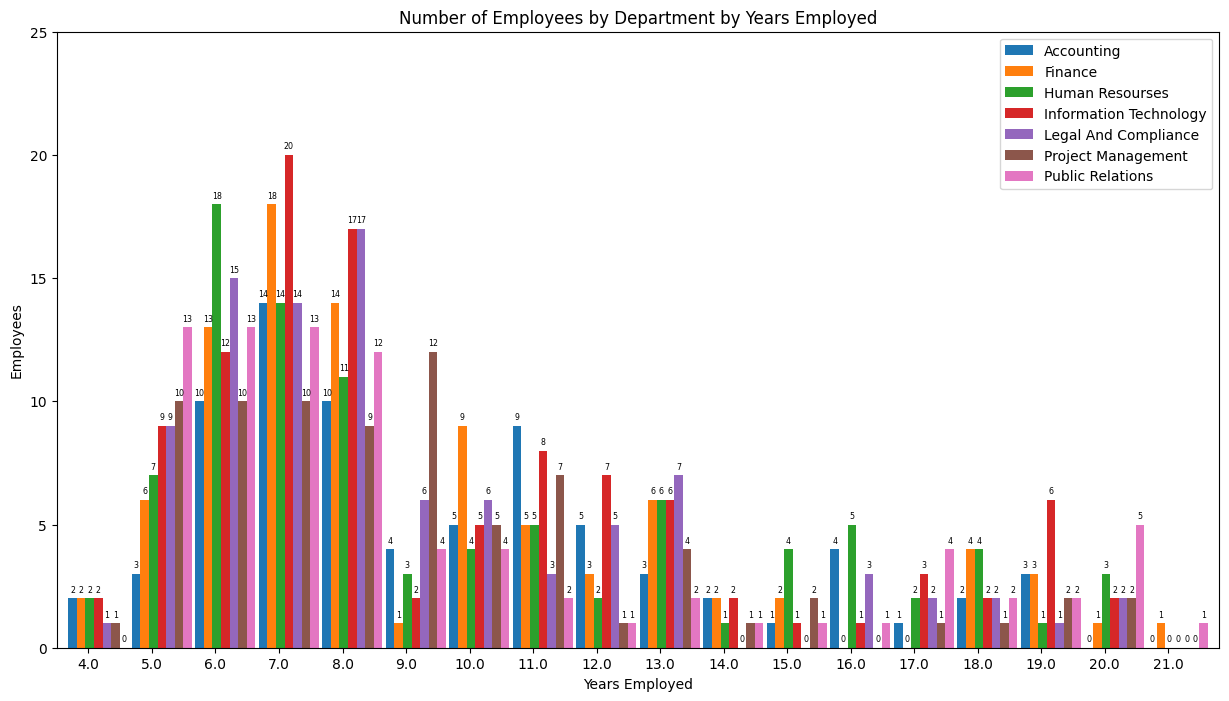

In [1378]:

emp_data_dept_data_rm_term['Years Employed'] =  pd.to_datetime('today').normalize() - pd.to_datetime(emp_data_dept_data_rm_term['hiredate'])
emp_data_dept_data_rm_term['Years Employed'] = round(emp_data_dept_data_rm_term['Years Employed']/np.timedelta64(1,'Y'))
emp_data_dept_data_rm_term_mod = pd.DataFrame().assign(deptName = emp_data_dept_data_rm_term['dept name'], yearsEmployed = emp_data_dept_data_rm_term['Years Employed'])
emp_data_dept_data_rm_term_mod
emp_data_dept_data_rm_term_piv = emp_data_dept_data_rm_term_mod.pivot_table(index='yearsEmployed', columns='deptName', aggfunc=len, fill_value=0)

emp_data_dept_data_rm_term_piv
years = emp_data_dept_data_rm_term_piv.index.to_list()
x = np.arange(len(years))  # the label locations
width = .135  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(figsize=(15, 8))
for dep, emp_count in emp_data_dept_data_rm_term_piv.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, emp_count, width, label=dep)
    ax.bar_label(rects, padding=3, fontsize=5.7)
    multiplier += 1
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Employees')
ax.set_title('Number of Employees by Department by Years Employed')
ax.set_xlabel('Years Employed')
ax.set_xticks(x + .25, years)
ax.legend(loc='upper right')
ax.set_ylim(0, 25)
ax.set_xmargin(.01)
plt.show()

<h2>Part 2 - b - SALARY ANALYSIS</h2>
NOTE: A normal distribution has the following attributes:<br>
68% within 1 standard deviation, 95% within 2 STD, 99% within 3 STD<br>
1 - Decode the salaries column

In [1379]:
emp_data_all['decode_salary'] = emp_data_all['salary'].map(lambda x: x[2:] if '3X' in x else '')
decoder = {'0': '7', '1': '8', '2': '9', '3': '0', '4': '1', '5': '2', '6': '3', '7': '4', '8': '5', '9' : '6'}
def decode(val):
    og = list(val)
    new = []
    for char in og:
        new.append(decoder[char])
    new_num = "".join(new)
    return new_num
emp_data_all['decode_salary'] = emp_data_all['decode_salary'].apply(decode)
emp_data_all['salary'] = emp_data_all['salary'].map(lambda x: x if '3X' not in x else '')
emp_data_all['new_salary'] = emp_data_all[['salary', 'decode_salary']].agg(' '.join, axis=1) 
emp_data_all = emp_data_all.drop(columns=['salary', 'decode_salary'])
emp_data_all = emp_data_all.rename(columns={'new_salary': 'Salary'})

emp_data_all['Salary'] = emp_data_all['Salary'].map(lambda i: ''.join([x for x in i if x.isdigit()]))
emp_data_all['Salary'] = emp_data_all['Salary'].astype(int)
emp_data_all

,fn,ln,mi,gender,sg,deptCode,hiredate,termdate,Name,Salary
645,Raymond,Abbott,,M,7,PUB,12/28/2002,,"Abbott, Raymond",321806
665,Keith,Acevedo,A,M,6,HR,5/6/2007,,"Acevedo, Keith A",173840
302,Patricia,Acosta,,F,2,HR,3/5/2018,,"Acosta, Patricia",58475
42,Benjamin,Adams,,M,2,COMP,3/21/2015,,"Adams, Benjamin",67712
449,Dennis,Adkins,,M,4,I.T.,5/1/2017,,"Adkins, Dennis",111088
...,...,...,...,...,...,...,...,...,...,...
540,Brandon,Zamora,,M,6,PROJ,10/6/2014,,"Zamora, Brandon",187062
667,Gerald,Zavala,J,M,5,PROJ,6/9/2014,,"Zavala, Gerald J",132100
472,Sean,Zhang,W,M,6,PROJ,1/11/2005,6/6/2006,"Zhang, Sean W",201450
379,Janice,Zimmerman,,F,5,FIN,3/2/2012,,"Zimmerman, Janice",125626


2 - Create a histogram of all salaries in deciles

(array([150., 151., 145.,  41.,  83.,  37.,  27.,  15.,  21.,   8.]),
 array([ 21875. ,  58780.7,  95686.4, 132592.1, 169497.8, 206403.5,
        243309.2, 280214.9, 317120.6, 354026.3, 390932. ]),
 <BarContainer object of 10 artists>)

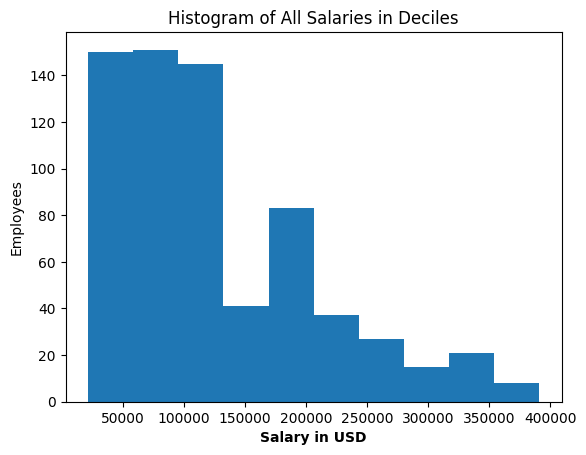

In [1380]:
plt.title("Histogram of All Salaries in Deciles")
plt.xlabel('Salary in USD', fontweight='bold')
plt.ylabel('Employees')
plt.hist(emp_data_all['Salary'], bins=10)

3 - Calculate the mean, mode, median, and standard deviation of the salaries

In [1381]:
print(emp_data_all['Salary'].describe())
print('********************************')
def calc_mode(salaries):
        mode = None
        temp_mode = {}
        for  num in salaries:
            if num not in temp_mode:
                temp_mode[num] = 0
            temp_mode[num] += 1
        ans_sort = sorted(temp_mode.items(),key = lambda kv: kv[1], reverse=True)
        max_num = ans_sort[0][1]
        if max_num > 1:
            mode = [num[0] for num in ans_sort if num[1] == max_num]
        return mode
all_mean = '{0:.2f}'.format(round(np.mean(emp_data_all['Salary']), 2))
print('The mean of the salaries = ', all_mean)
all_mode = calc_mode(emp_data_all['Salary'].tolist())
print('The mode of the salaries = ', all_mode)
all_median = '{0:.2f}'.format(round(np.median(emp_data_all['Salary']), 2))
print('The median of the salaries =  ', all_median)
all_standard_deviation = '{0:.2f}'.format(round(stats.stdev(emp_data_all['Salary']), 2))
print('The standard deviation of the salaries = ', all_standard_deviation)

count       678.000000
mean     126009.401180
std       82229.676067
min       21875.000000
25%       64228.000000
50%      104849.500000
75%      177519.000000
max      390932.000000
Name: Salary, dtype: float64
********************************
The mean of the salaries =  126009.40
The mode of the salaries =  None
The median of the salaries =   104849.50
The standard deviation of the salaries =  82229.68


4 - Is the salary distribution a normal distribution?

In [1382]:
def calc_mean(salaries):
        salaries.sort()
        if len(salaries) > 0:
            return round(sum(salaries)/len(salaries),2)
        
def calc_variance(salaries):
        salaries.sort()
        return sum([(x-calc_mean(salaries))**2 for x in salaries])/len(salaries)

def calc_stdev(salaries):
    return math.sqrt(calc_variance(salaries))

def calc_skew(salaries):
        salaries.sort()
        lst = salaries
        mean = sum(lst)/len(lst)
        skew = sum([(x-mean)**3 for x in lst])/len(lst)
        return round(skew/(calc_stdev(salaries)**3),3)

def calc_kurtosis(salaries):
    salaries.sort()
    mean = sum(salaries)/len(salaries)
    kurt_part1 = sum([(x-mean)**4 for x in salaries])/len(salaries)
    return (round(kurt_part1/(calc_stdev(salaries)**4),3))

def calc_excess_kurtosis(salaries):
        return round(calc_kurtosis(salaries) - 3, 3)

salary_skewness = calc_skew(emp_data_all['Salary'].tolist())
print('The skewness for all of the salaries is ', salary_skewness)
print('The skewness of a normal distribution is 0. Because the skewness for all of the salaries is ', salary_skewness, ' and not 0 we can quantitatively know the salaries do not fall into a normal distribution.')
salary_kurtosis = calc_kurtosis(emp_data_all['Salary'].tolist())
print('The kurtosis for all of the salaries is ', salary_kurtosis)
print('The kurtosis for a standard normal distribution is 3.')
print('Because the kurtosis for all of the salaries is ', salary_kurtosis, ' and not 3, we can quantitatively know all of the salaries do not fall within a normal distribution.')
print('No, the salary distribution is not a normal distribution.')
salary_excess_kurtosis = calc_excess_kurtosis(emp_data_all['Salary'].tolist())
print('The excess kurtosis of all of the salaries is ', salary_excess_kurtosis)
print('Excess kurtosis for a normal distribution is 0.')
print('Because the excess kurtosis for all of the salaries is ', salary_excess_kurtosis, ' and not 0 we can quantitatively know that all of the salaries do not fall within a normal distribution.')
print('Also, by visualizing the salary histogram you can see the distribution is clearly weighted toward the left, with the vast majority of salaries falling well below both the mean and median values.')

The skewness for all of the salaries is  1.024
The skewness of a normal distribution is 0. Because the skewness for all of the salaries is  1.024  and not 0 we can quantitatively know the salaries do not fall into a normal distribution.
The kurtosis for all of the salaries is  3.459
The kurtosis for a standard normal distribution is 3.
Because the kurtosis for all of the salaries is  3.459  and not 3, we can quantitatively know all of the salaries do not fall within a normal distribution.
No, the salary distribution is not a normal distribution.
The excess kurtosis of all of the salaries is  0.459
Excess kurtosis for a normal distribution is 0.
Because the excess kurtosis for all of the salaries is  0.459  and not 0 we can quantitatively know that all of the salaries do not fall within a normal distribution.
Also, by visualizing the salary histogram you can see the distribution is clearly weighted toward the left, with the vast majority of salaries falling well below both the mean and 

5 - Calculate the mean, mode, median, and standard deviation of the salaries of men

In [1383]:
male_salaries = emp_data_all['Salary'][emp_data_all['gender'] == 'M']
print(male_salaries.describe())
print('********************************')
def calc_mode(salaries):
        mode = None
        temp_mode = {}
        for  num in salaries:
            if num not in temp_mode:
                temp_mode[num] = 0
            temp_mode[num] += 1
        ans_sort = sorted(temp_mode.items(),key = lambda kv: kv[1], reverse=True)
        max_num = ans_sort[0][1]
        if max_num > 1:
            mode = [num[0] for num in ans_sort if num[1] == max_num]
        return mode
male_mean = '{0:.2f}'.format(round(np.mean(male_salaries), 2))
print('The mean of the salaries for men = ', male_mean)
male_mode = calc_mode(male_salaries.tolist())
print('The mode of the salries for men = ', male_mode)
male_median = '{0:.2f}'.format(round(np.median(male_salaries), 2))
print('The median of the salaries for men =  ', male_median)
male_standard_deviation = '{0:.2f}'.format(round(stats.stdev(male_salaries), 2))
print('The standard deviation of the salaries for men = ', male_standard_deviation)

count       477.000000
mean     127455.274633
std       84843.894807
min       22036.000000
25%       64176.000000
50%      104722.000000
75%      182589.000000
max      390932.000000
Name: Salary, dtype: float64
********************************
The mean of the salaries for men =  127455.27
The mode of the salries for men =  None
The median of the salaries for men =   104722.00
The standard deviation of the salaries for men =  84843.89


6 - Calculate the mean, mode, median, and standard deviation of the salaries of women

In [1384]:
female_salaries = emp_data_all['Salary'][emp_data_all['gender'] == 'F']
print(female_salaries.describe())
print('********************************')
def calc_mode(salaries):
        mode = None
        temp_mode = {}
        for  num in salaries:
            if num not in temp_mode:
                temp_mode[num] = 0
            temp_mode[num] += 1
        ans_sort = sorted(temp_mode.items(),key = lambda kv: kv[1], reverse=True)
        max_num = ans_sort[0][1]
        if max_num > 1:
            mode = [num[0] for num in ans_sort if num[1] == max_num]
        return mode
female_mean = '{0:.2f}'.format(round(np.mean(female_salaries), 2))
print('The mean of the salaries for women = ', female_mean)
female_mode = calc_mode(female_salaries.tolist())
print('The mode of the salaries for women = ', female_mode)
female_median = '{0:.2f}'.format(round(np.median(female_salaries), 2))
print('The median of the salaries for women =  ', female_median)
female_standard_deviation = '{0:.2f}'.format(round(stats.stdev(female_salaries), 2))
print('The standard deviation of the salaries for women = ', female_standard_deviation)

count       201.000000
mean     122578.149254
std       75757.539419
min       21875.000000
25%       65941.000000
50%      106025.000000
75%      173288.000000
max      346862.000000
Name: Salary, dtype: float64
********************************
The mean of the salaries for women =  122578.15
The mode of the salaries for women =  None
The median of the salaries for women =   106025.00
The standard deviation of the salaries for women =  75757.54


7 - Is the standard deviation, mean, mode, median higher for men? Calulate the % difference

In [1385]:
def percent_diff(male, female):
    if male + female == 0:
        return 0
    ans = ((male - female)/((male + female)/2)) * 100
    return round(ans, 2)

print('The standard deviation for men is ', male_standard_deviation, ' and for women is ', female_standard_deviation, '. The standard is higher for ', 'wommen.' if female_standard_deviation > male_standard_deviation else 'men.')
stand_dev_diff = percent_diff(float(male_standard_deviation), float(female_standard_deviation))
print('The percent difference between male standard deviation and female standard devaiation is ', stand_dev_diff, '%')

print('The mean for men is ', male_mean, ' and for women is ', female_mean, '. The mean is higher for ', 'men.' if male_mean > female_mean else 'women.')
mean_diff = percent_diff(float(male_mean), float(female_mean))
print('The percent difference between male mean and female mean is ', mean_diff, '%')

new_male_mode = 0 if male_mode == None else male_mode
new_female_mode = 0 if female_mode == None else female_mode
print('The mode for men is ', new_male_mode, ' and for women is ', new_female_mode, '. The mode is higher for ', 'men.' if new_male_mode > new_female_mode else '' 'women.' if new_female_mode > new_male_mode else '' 'neither male or female.' if new_male_mode == new_female_mode else '')
mode_diff = percent_diff(float(new_male_mode), float(new_male_mode))
print('The percent difference between male mode and female mode is ', mode_diff, '%')

print('The median for men is ', male_median, ' and for women is ', female_median, '. The median is higher for ', 'men.' if male_median > female_median else 'women.')
median_diff = percent_diff(float(male_median), float(female_median))
print('The percent difference between male median and female median is ', median_diff, '%')

The standard deviation for men is  84843.89  and for women is  75757.54 . The standard is higher for  men.
The percent difference between male standard deviation and female standard devaiation is  11.32 %
The mean for men is  127455.27  and for women is  122578.15 . The mean is higher for  men.
The percent difference between male mean and female mean is  3.9 %
The mode for men is  0  and for women is  0 . The mode is higher for  neither male or female.
The percent difference between male mode and female mode is  0 %
The median for men is  104722.00  and for women is  106025.00 . The median is higher for  women.
The percent difference between male median and female median is  -1.24 %


8 - Write up- Do you think there is salary bias?

(array([108., 104., 101.,  29.,  56.,  24.,  20.,  10.,  17.,   8.]),
 array([ 22036. ,  58925.6,  95815.2, 132704.8, 169594.4, 206484. ,
        243373.6, 280263.2, 317152.8, 354042.4, 390932. ]),
 <BarContainer object of 10 artists>)

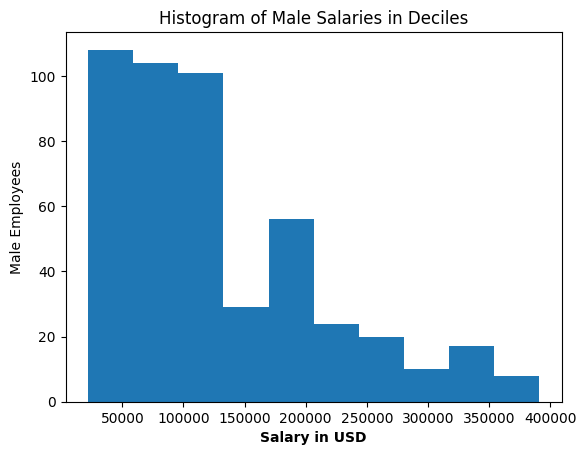

In [1386]:
plt.title("Histogram of Male Salaries in Deciles")
plt.xlabel('Salary in USD', fontweight='bold')
plt.ylabel('Male Employees')
plt.hist(male_salaries, bins=10)

(array([39., 39., 34., 24., 27., 12., 11.,  7.,  4.,  4.]),
 array([ 21875. ,  54373.7,  86872.4, 119371.1, 151869.8, 184368.5,
        216867.2, 249365.9, 281864.6, 314363.3, 346862. ]),
 <BarContainer object of 10 artists>)

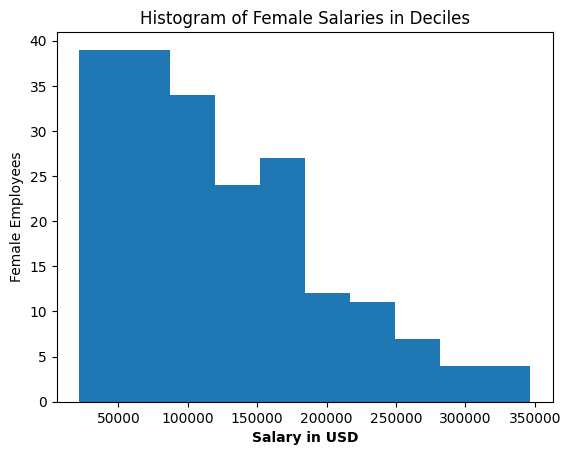

In [1387]:
plt.title("Histogram of Female Salaries in Deciles")
plt.xlabel('Salary in USD', fontweight='bold')
plt.ylabel('Female Employees')
plt.hist(female_salaries, bins=10)

In [1388]:
print('Based on the histograms of salaries by gender, there does not seem to be a significant salary bias between genders.')
print('Because the salary distribution for each gender is skewed, it is more appropriate to use the median rather than the mean.')
print('The percent difference in median between males and females is ', median_diff, '%.')
print('Typically in statistics you are looking for a 5% confidence interval.')
print('This means that although there is a slight gender bias towards females, the bias is statistically insignificant.')
print('Therefore my finding is that there is no statistical bias toward one gender over the other.')


Based on the histograms of salaries by gender, there does not seem to be a significant salary bias between genders.
Because the salary distribution for each gender is skewed, it is more appropriate to use the median rather than the mean.
The percent difference in median between males and females is  -1.24 %.
Typically in statistics you are looking for a 5% confidence interval.
This means that although there is a slight gender bias towards females, the bias is statistically insignificant.
Therefore my finding is that there is no statistical bias toward one gender over the other.


<h2>Part 2 - c</h2>
The salary grades of 5 - 7 are considered executive salary grades - Exempt or EXECUTIVE<br>
1 - create a new column called 'Status' Label each employee record in alpha order by name as EXEMPT or NON-EXEMPT

In [1389]:
emp_data_all['Status'] = emp_data_all['sg'].map(lambda x: 'EXEMPT' if x in [5, 6, 7] else 'NON-EXEMPT')
emp_data_all

,fn,ln,mi,gender,sg,deptCode,hiredate,termdate,Name,Salary,Status
645,Raymond,Abbott,,M,7,PUB,12/28/2002,,"Abbott, Raymond",321806,EXEMPT
665,Keith,Acevedo,A,M,6,HR,5/6/2007,,"Acevedo, Keith A",173840,EXEMPT
302,Patricia,Acosta,,F,2,HR,3/5/2018,,"Acosta, Patricia",58475,NON-EXEMPT
42,Benjamin,Adams,,M,2,COMP,3/21/2015,,"Adams, Benjamin",67712,NON-EXEMPT
449,Dennis,Adkins,,M,4,I.T.,5/1/2017,,"Adkins, Dennis",111088,NON-EXEMPT
...,...,...,...,...,...,...,...,...,...,...,...
540,Brandon,Zamora,,M,6,PROJ,10/6/2014,,"Zamora, Brandon",187062,EXEMPT
667,Gerald,Zavala,J,M,5,PROJ,6/9/2014,,"Zavala, Gerald J",132100,EXEMPT
472,Sean,Zhang,W,M,6,PROJ,1/11/2005,6/6/2006,"Zhang, Sean W",201450,EXEMPT
379,Janice,Zimmerman,,F,5,FIN,3/2/2012,,"Zimmerman, Janice",125626,EXEMPT


2 - Calculate the mean, mode, median, and standard deviation of the salaries of each salary grade

In [1390]:
sg_one_salaries = emp_data_all['Salary'][emp_data_all['sg'] == 1]
print(sg_one_salaries.describe())
print('********************************')
def calc_mode(salaries):
        mode = None
        temp_mode = {}
        for  num in salaries:
            if num not in temp_mode:
                temp_mode[num] = 0
            temp_mode[num] += 1
        ans_sort = sorted(temp_mode.items(),key = lambda kv: kv[1], reverse=True)
        max_num = ans_sort[0][1]
        if max_num > 1:
            mode = [num[0] for num in ans_sort if num[1] == max_num]
        return mode
sg_one_mean = '{0:.2f}'.format(round(np.mean(sg_one_salaries), 2))
print('The mean of the salaries for SG 1 = ', sg_one_mean)
sg_one_mode = calc_mode(sg_one_salaries.tolist())
print('The mode of the salries for SG 1 = ', sg_one_mode)
sg_one_median = '{0:.2f}'.format(round(np.median(sg_one_salaries), 2))
print('The median of the salaries for SG 1 =  ', sg_one_median)
sg_one_standard_deviation = '{0:.2f}'.format(round(stats.stdev(sg_one_salaries), 2))
print('The standard deviation of the salaries for SG 1 = ', sg_one_standard_deviation)

count       87.000000
mean     32051.827586
std       7742.479699
min      21875.000000
25%      26065.000000
50%      31974.000000
75%      36368.000000
max      77582.000000
Name: Salary, dtype: float64
********************************
The mean of the salaries for SG 1 =  32051.83
The mode of the salries for SG 1 =  None
The median of the salaries for SG 1 =   31974.00
The standard deviation of the salaries for SG 1 =  7742.48


In [1391]:
sg_two_salaries = emp_data_all['Salary'][emp_data_all['sg'] == 2]
print(sg_two_salaries.describe())
print('********************************')
def calc_mode(salaries):
        mode = None
        temp_mode = {}
        for  num in salaries:
            if num not in temp_mode:
                temp_mode[num] = 0
            temp_mode[num] += 1
        ans_sort = sorted(temp_mode.items(),key = lambda kv: kv[1], reverse=True)
        max_num = ans_sort[0][1]
        if max_num > 1:
            mode = [num[0] for num in ans_sort if num[1] == max_num]
        return mode
sg_two_mean = '{0:.2f}'.format(round(np.mean(sg_two_salaries), 2))
print('The mean of the salaries for SG 2 = ', sg_two_mean)
sg_two_mode = calc_mode(sg_two_salaries.tolist())
print('The mode of the salries for SG 2 = ', sg_two_mode)
sg_two_median = '{0:.2f}'.format(round(np.median(sg_two_salaries), 2))
print('The median of the salaries for SG 2 =  ', sg_two_median)
sg_two_standard_deviation = '{0:.2f}'.format(round(stats.stdev(sg_two_salaries), 2))
print('The standard deviation of the salaries for SG 2 = ', sg_two_standard_deviation)

count       94.000000
mean     53962.361702
std       8269.709712
min      37865.000000
25%      47014.500000
50%      52601.000000
75%      61352.500000
max      73281.000000
Name: Salary, dtype: float64
********************************
The mean of the salaries for SG 2 =  53962.36
The mode of the salries for SG 2 =  None
The median of the salaries for SG 2 =   52601.00
The standard deviation of the salaries for SG 2 =  8269.71


In [1392]:
sg_three_salaries = emp_data_all['Salary'][emp_data_all['sg'] == 3]
print(sg_three_salaries.describe())
print('********************************')
def calc_mode(salaries):
        mode = None
        temp_mode = {}
        for  num in salaries:
            if num not in temp_mode:
                temp_mode[num] = 0
            temp_mode[num] += 1
        ans_sort = sorted(temp_mode.items(),key = lambda kv: kv[1], reverse=True)
        max_num = ans_sort[0][1]
        if max_num > 1:
            mode = [num[0] for num in ans_sort if num[1] == max_num]
        return mode
sg_three_mean = '{0:.2f}'.format(round(np.mean(sg_three_salaries), 2))
print('The mean of the salaries for SG 3 = ', sg_three_mean)
sg_three_mode = calc_mode(sg_three_salaries.tolist())
print('The mode of the salries for SG 3 = ', sg_three_mode)
sg_three_median = '{0:.2f}'.format(round(np.median(sg_three_salaries), 2))
print('The median of the salaries for SG 3 =  ', sg_three_median)
sg_three_standard_deviation = '{0:.2f}'.format(round(stats.stdev(sg_three_salaries), 2))
print('The standard deviation of the salaries for SG 3 = ', sg_three_standard_deviation)

count       102.000000
mean      79272.558824
std        9587.538207
min       55463.000000
25%       71897.000000
50%       78271.000000
75%       86451.250000
max      102594.000000
Name: Salary, dtype: float64
********************************
The mean of the salaries for SG 3 =  79272.56
The mode of the salries for SG 3 =  None
The median of the salaries for SG 3 =   78271.00
The standard deviation of the salaries for SG 3 =  9587.54


In [1393]:
sg_four_salaries = emp_data_all['Salary'][emp_data_all['sg'] == 4]
print(sg_four_salaries.describe())
print('********************************')
def calc_mode(salaries):
        mode = None
        temp_mode = {}
        for  num in salaries:
            if num not in temp_mode:
                temp_mode[num] = 0
            temp_mode[num] += 1
        ans_sort = sorted(temp_mode.items(),key = lambda kv: kv[1], reverse=True)
        max_num = ans_sort[0][1]
        if max_num > 1:
            mode = [num[0] for num in ans_sort if num[1] == max_num]
        return mode
sg_four_mean = '{0:.2f}'.format(round(np.mean(sg_four_salaries), 2))
print('The mean of the salaries for SG 4 = ', sg_four_mean)
sg_four_mode = calc_mode(sg_four_salaries.tolist())
print('The mode of the salries for SG 4 = ', sg_four_mode)
sg_four_median = '{0:.2f}'.format(round(np.median(sg_four_salaries), 2))
print('The median of the salaries for SG 4 =  ', sg_four_median)
sg_four_standard_deviation = '{0:.2f}'.format(round(stats.stdev(sg_four_salaries), 2))
print('The standard deviation of the salaries for SG 4 = ', sg_four_standard_deviation)

count       103.000000
mean     104523.184466
std        9706.052510
min       76809.000000
25%       96943.500000
50%      104098.000000
75%      110894.000000
max      129566.000000
Name: Salary, dtype: float64
********************************
The mean of the salaries for SG 4 =  104523.18
The mode of the salries for SG 4 =  None
The median of the salaries for SG 4 =   104098.00
The standard deviation of the salaries for SG 4 =  9706.05


In [1394]:
sg_five_salaries = emp_data_all['Salary'][emp_data_all['sg'] == 5]
print(sg_five_salaries.describe())
print('********************************')
def calc_mode(salaries):
        mode = None
        temp_mode = {}
        for  num in salaries:
            if num not in temp_mode:
                temp_mode[num] = 0
            temp_mode[num] += 1
        ans_sort = sorted(temp_mode.items(),key = lambda kv: kv[1], reverse=True)
        max_num = ans_sort[0][1]
        if max_num > 1:
            mode = [num[0] for num in ans_sort if num[1] == max_num]
        return mode
sg_five_mean = '{0:.2f}'.format(round(np.mean(sg_five_salaries), 2))
print('The mean of the salaries for SG 5 = ', sg_five_mean)
sg_five_mode = calc_mode(sg_five_salaries.tolist())
print('The mode of the salries for SG 5 = ', sg_five_mode)
sg_five_median = '{0:.2f}'.format(round(np.median(sg_five_salaries), 2))
print('The median of the salaries for SG 5 =  ', sg_five_median)
sg_five_standard_deviation = '{0:.2f}'.format(round(stats.stdev(sg_five_salaries), 2))
print('The standard deviation of the salaries for SG 5 = ', sg_five_standard_deviation)

count        88.000000
mean     129634.159091
std       11040.458461
min      100202.000000
25%      122655.000000
50%      129741.500000
75%      136880.500000
max      159904.000000
Name: Salary, dtype: float64
********************************
The mean of the salaries for SG 5 =  129634.16
The mode of the salries for SG 5 =  None
The median of the salaries for SG 5 =   129741.50
The standard deviation of the salaries for SG 5 =  11040.46


In [1395]:
sg_six_salaries = emp_data_all['Salary'][emp_data_all['sg'] == 6]
print(sg_six_salaries.describe())
print('********************************')
def calc_mode(salaries):
        mode = None
        temp_mode = {}
        for  num in salaries:
            if num not in temp_mode:
                temp_mode[num] = 0
            temp_mode[num] += 1
        ans_sort = sorted(temp_mode.items(),key = lambda kv: kv[1], reverse=True)
        max_num = ans_sort[0][1]
        if max_num > 1:
            mode = [num[0] for num in ans_sort if num[1] == max_num]
        return mode
sg_six_mean = '{0:.2f}'.format(round(np.mean(sg_six_salaries), 2))
print('The mean of the salaries for SG 6 = ', sg_six_mean)
sg_six_mode = calc_mode(sg_six_salaries.tolist())
print('The mode of the salries for SG 6 = ', sg_six_mode)
sg_six_median = '{0:.2f}'.format(round(np.median(sg_six_salaries), 2))
print('The median of the salaries for SG 6 =  ', sg_six_median)
sg_six_standard_deviation = '{0:.2f}'.format(round(stats.stdev(sg_six_salaries), 2))
print('The standard deviation of the salaries for SG 6 = ', sg_six_standard_deviation)

count        92.000000
mean     182704.891304
std       12810.656370
min      154840.000000
25%      173934.500000
50%      183464.000000
75%      191226.250000
max      212587.000000
Name: Salary, dtype: float64
********************************
The mean of the salaries for SG 6 =  182704.89
The mode of the salries for SG 6 =  None
The median of the salaries for SG 6 =   183464.00
The standard deviation of the salaries for SG 6 =  12810.66


In [1396]:
sg_seven_salaries = emp_data_all['Salary'][emp_data_all['sg'] == 7]
print(sg_seven_salaries.describe())
print('********************************')
def calc_mode(salaries):
        mode = None
        temp_mode = {}
        for  num in salaries:
            if num not in temp_mode:
                temp_mode[num] = 0
            temp_mode[num] += 1
        ans_sort = sorted(temp_mode.items(),key = lambda kv: kv[1], reverse=True)
        max_num = ans_sort[0][1]
        if max_num > 1:
            mode = [num[0] for num in ans_sort if num[1] == max_num]
        return mode
sg_seven_mean = '{0:.2f}'.format(round(np.mean(sg_seven_salaries), 2))
print('The mean of the salaries for SG 7 = ', sg_seven_mean)
sg_seven_mode = calc_mode(sg_seven_salaries.tolist())
print('The mode of the salries for SG 7 = ', sg_seven_mode)
sg_seven_median = '{0:.2f}'.format(round(np.median(sg_seven_salaries), 2))
print('The median of the salaries for SG 7 =  ', sg_seven_median)
sg_seven_standard_deviation = '{0:.2f}'.format(round(stats.stdev(sg_seven_salaries), 2))
print('The standard deviation of the salaries for SG 7 = ', sg_seven_standard_deviation)

count       112.000000
mean     272366.589286
std       51939.508793
min      181470.000000
25%      227330.500000
50%      262726.000000
75%      317666.250000
max      390932.000000
Name: Salary, dtype: float64
********************************
The mean of the salaries for SG 7 =  272366.59
The mode of the salries for SG 7 =  None
The median of the salaries for SG 7 =   262726.00
The standard deviation of the salaries for SG 7 =  51939.51


3 - Calculate the mean, mode, median, and standard deviation of the salaries of EXEMPT employees

In [1397]:
exempt_salaries = emp_data_all['Salary'][emp_data_all['Status'] == 'EXEMPT']
print(exempt_salaries.describe())
print('********************************')
def calc_mode(salaries):
        mode = None
        temp_mode = {}
        for  num in salaries:
            if num not in temp_mode:
                temp_mode[num] = 0
            temp_mode[num] += 1
        ans_sort = sorted(temp_mode.items(),key = lambda kv: kv[1], reverse=True)
        max_num = ans_sort[0][1]
        if max_num > 1:
            mode = [num[0] for num in ans_sort if num[1] == max_num]
        return mode
exempt_mean = '{0:.2f}'.format(round(np.mean(exempt_salaries), 2))
print('The mean of the salaries for EXEMPT employees = ', exempt_mean)
exempt_mode = calc_mode(exempt_salaries.tolist())
print('The mode of the salries for EXEMPT employees = ', exempt_mode)
exempt_median = '{0:.2f}'.format(round(np.median(exempt_salaries), 2))
print('The median of the salaries for EXEMPT employees =  ', exempt_median)
exempt_standard_deviation = '{0:.2f}'.format(round(stats.stdev(exempt_salaries), 2))
print('The standard deviation of the salaries for EXEMPT employees = ', exempt_standard_deviation)

count       292.000000
mean     201101.760274
std       68724.359862
min      100202.000000
25%      139693.000000
50%      187105.000000
75%      237234.500000
max      390932.000000
Name: Salary, dtype: float64
********************************
The mean of the salaries for EXEMPT employees =  201101.76
The mode of the salries for EXEMPT employees =  None
The median of the salaries for EXEMPT employees =   187105.00
The standard deviation of the salaries for EXEMPT employees =  68724.36


4 - Calculate the mean, mode, median, and standard deviation of the salaries of NON-EXEMPT employees

In [1398]:
nonexempt_salaries = emp_data_all['Salary'][emp_data_all['Status'] == 'NON-EXEMPT']
print(nonexempt_salaries.describe())
print('********************************')
def calc_mode(salaries):
        mode = None
        temp_mode = {}
        for  num in salaries:
            if num not in temp_mode:
                temp_mode[num] = 0
            temp_mode[num] += 1
        ans_sort = sorted(temp_mode.items(),key = lambda kv: kv[1], reverse=True)
        max_num = ans_sort[0][1]
        if max_num > 1:
            mode = [num[0] for num in ans_sort if num[1] == max_num]
        return mode
nonexempt_mean = '{0:.2f}'.format(round(np.mean(nonexempt_salaries), 2))
print('The mean of the salaries for NON-EXEMPT employees = ', nonexempt_mean)
nonnonexempt_mode = calc_mode(nonexempt_salaries.tolist())
print('The mode of the salries for NON-EXEMPT employees = ', nonnonexempt_mode)
nonexempt_median = '{0:.2f}'.format(round(np.median(nonexempt_salaries), 2))
print('The median of the salaries for NON-EXEMPT employees =  ', nonexempt_median)
nonexempt_standard_deviation = '{0:.2f}'.format(round(stats.stdev(nonexempt_salaries), 2))
print('The standard deviation of the salaries for NON-EXEMPT employees = ', nonexempt_standard_deviation)

count       386.000000
mean      69203.782383
std       28428.875973
min       21875.000000
25%       44321.750000
50%       68406.500000
75%       94241.250000
max      129566.000000
Name: Salary, dtype: float64
********************************
The mean of the salaries for NON-EXEMPT employees =  69203.78
The mode of the salries for NON-EXEMPT employees =  None
The median of the salaries for NON-EXEMPT employees =   68406.50
The standard deviation of the salaries for NON-EXEMPT employees =  28428.88


5 - Create pie charts of the employee status of EXEMPT count by gender and NON-EXEMPT count by gender

In [1399]:
emp_data_all
status_cats = emp_data_all['Status'].unique()
status_cats
status_data = pd.DataFrame(columns=['Male', 'Female'])
status_data.index.name = 'STATUS'
status_data.columns.name = 'GENDER'
for i in status_cats:
    male_count = emp_data_all.loc[(emp_data_all['Status'] == i) & (emp_data_all['gender'] == 'M')]
    male_count = male_count['gender'].value_counts()['M']
    female_count = emp_data_all.loc[(emp_data_all['Status'] == i) & (emp_data_all['gender'] == 'F')]
    female_count = female_count['gender'].value_counts()['F']
    status_data.loc[i]=[male_count, female_count]
status_data = status_data.sort_index()
status_data

GENDER,Male,Female
STATUS,,
EXEMPT,193,99
NON-EXEMPT,284,102


/var/folders/dr/dnghq6r96vdfqhr_t9n_5pg00000gn/T/ipykernel_7560/40367737.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 2, n + 1)


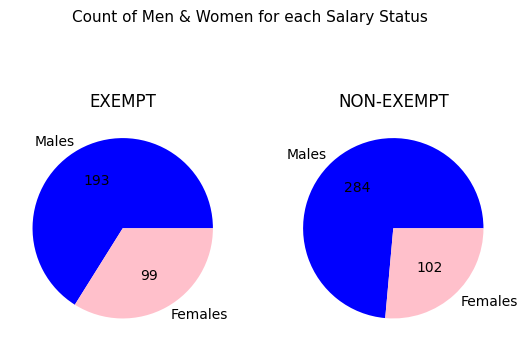

In [1400]:
status_labels = ['Males', 'Females']
fig, ax = plt.subplots()
status_labels
fig.suptitle("Count of Men & Women for each Salary Status", fontsize=11, y=0.95)
for n in range(len(status_data)):
    ax = plt.subplot(1, 2, n + 1)
    status_count = status_data.loc[status_cats[n], ['Male','Female']].values.flatten().tolist()
    status_name = status_cats[n]
    ax.set_title(status_name)
    p, a, autotexts = ax.pie(status_count, labels=status_labels, autopct='', colors=['blue', 'pink'])

    for i, a in enumerate(autotexts):
        a.set_text("{}".format(int(status_count[i])))
plt.show()

6 - Create scatter plots of salary grade by mean salary

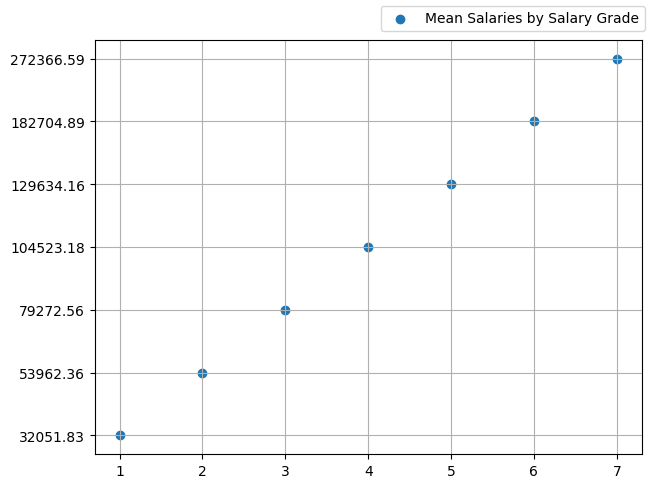

In [1401]:
sg_mean_salaries = [sg_one_mean, sg_two_mean, sg_three_mean, sg_four_mean, sg_five_mean, sg_six_mean, sg_seven_mean]
index_sg_salaries = [*range(1, len(sg_mean_salaries)+1)]
index_sg_salaries
fig, ax = plt.subplots(layout='constrained')
ax.scatter(index_sg_salaries, sg_mean_salaries, label='Mean Salaries by Salary Grade')

fig.legend(loc='outside upper right')
ax.grid(True)

plt.show()


7 - Create a scatter plots of salary grade by mean salary for men

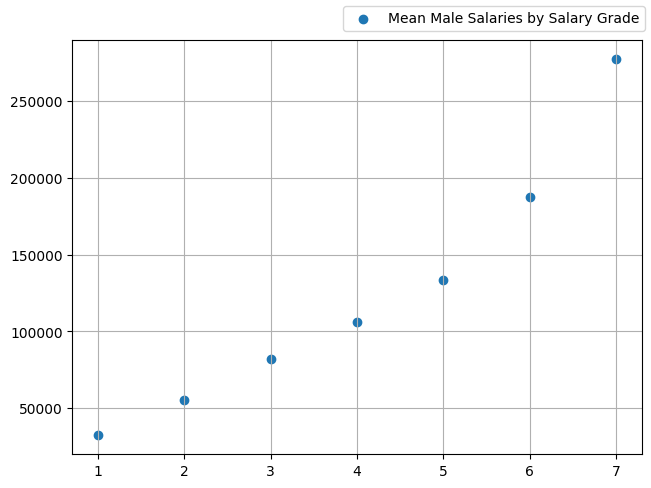

In [1402]:
male_sg_one_salaries = emp_data_all['Salary'][(emp_data_all['sg'] == 1) & (emp_data_all['gender'] == 'M')]
male_sg_one_mean = round(np.mean(male_sg_one_salaries), 2)
male_sg_two_salaries = emp_data_all['Salary'][(emp_data_all['sg'] == 2) & (emp_data_all['gender'] == 'M')]
male_sg_two_mean = round(np.mean(male_sg_two_salaries), 2)
male_sg_three_salaries = emp_data_all['Salary'][(emp_data_all['sg'] == 3) & (emp_data_all['gender'] == 'M')]
male_sg_three_mean = round(np.mean(male_sg_three_salaries), 2)
male_sg_four_salaries = emp_data_all['Salary'][(emp_data_all['sg'] == 4) & (emp_data_all['gender'] == 'M')]
male_sg_four_mean = round(np.mean(male_sg_four_salaries), 2)
male_sg_five_salaries = emp_data_all['Salary'][(emp_data_all['sg'] == 5) & (emp_data_all['gender'] == 'M')]
male_sg_five_mean = round(np.mean(male_sg_five_salaries), 2)
male_sg_six_salaries = emp_data_all['Salary'][(emp_data_all['sg'] == 6) & (emp_data_all['gender'] == 'M')]
male_sg_six_mean = round(np.mean(male_sg_six_salaries), 2)
male_sg_seven_salaries = emp_data_all['Salary'][(emp_data_all['sg'] == 7) & (emp_data_all['gender'] == 'M')]
male_sg_seven_mean = round(np.mean(male_sg_seven_salaries), 2)

male_sg_mean_salaries = [male_sg_one_mean, male_sg_two_mean, male_sg_three_mean, male_sg_four_mean, male_sg_five_mean, male_sg_six_mean, male_sg_seven_mean]
male_index_sg_salaries = [*range(1, len(male_sg_mean_salaries)+1)]
male_index_sg_salaries
fig, ax_male_sg = plt.subplots(layout='constrained')
ax_male_sg.scatter(male_index_sg_salaries, male_sg_mean_salaries, label='Mean Male Salaries by Salary Grade')

fig.legend(loc='outside upper right')
ax_male_sg.grid(True)

plt.show()


8 - Create a scatter plots of salary grade by mean salary for women

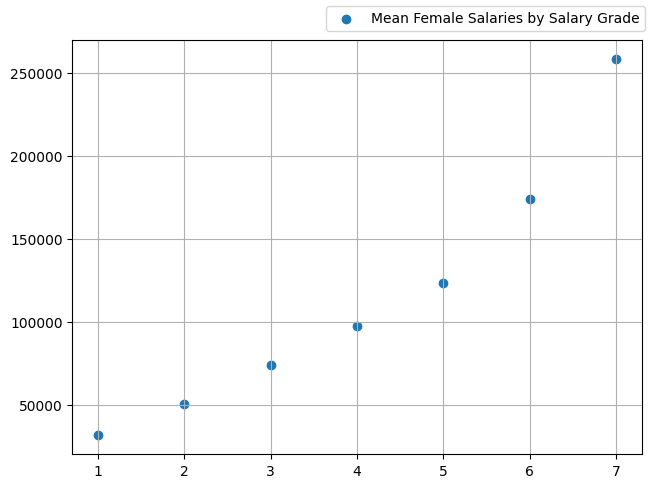

In [1403]:
female_sg_one_salaries = emp_data_all['Salary'][(emp_data_all['sg'] == 1) & (emp_data_all['gender'] == 'F')]
female_sg_one_mean = round(np.mean(female_sg_one_salaries), 2)
female_sg_two_salaries = emp_data_all['Salary'][(emp_data_all['sg'] == 2) & (emp_data_all['gender'] == 'F')]
female_sg_two_mean = round(np.mean(female_sg_two_salaries), 2)
female_sg_three_salaries = emp_data_all['Salary'][(emp_data_all['sg'] == 3) & (emp_data_all['gender'] == 'F')]
female_sg_three_mean = round(np.mean(female_sg_three_salaries), 2)
female_sg_four_salaries = emp_data_all['Salary'][(emp_data_all['sg'] == 4) & (emp_data_all['gender'] == 'F')]
female_sg_four_mean = round(np.mean(female_sg_four_salaries), 2)
female_sg_five_salaries = emp_data_all['Salary'][(emp_data_all['sg'] == 5) & (emp_data_all['gender'] == 'F')]
female_sg_five_mean = round(np.mean(female_sg_five_salaries), 2)
female_sg_six_salaries = emp_data_all['Salary'][(emp_data_all['sg'] == 6) & (emp_data_all['gender'] == 'F')]
female_sg_six_mean = round(np.mean(female_sg_six_salaries), 2)
female_sg_seven_salaries = emp_data_all['Salary'][(emp_data_all['sg'] == 7) & (emp_data_all['gender'] == 'F')]
female_sg_seven_mean = round(np.mean(female_sg_seven_salaries), 2)

female_sg_mean_salaries = [female_sg_one_mean, female_sg_two_mean, female_sg_three_mean, female_sg_four_mean, female_sg_five_mean, female_sg_six_mean, female_sg_seven_mean]
female_index_sg_salaries = [*range(1, len(female_sg_mean_salaries)+1)]
female_index_sg_salaries
fig, ax = plt.subplots(layout='constrained')
ax.scatter(female_index_sg_salaries, female_sg_mean_salaries, label='Mean Female Salaries by Salary Grade')

fig.legend(loc='outside upper right')
ax.grid(True)

plt.show()

9 - Create a horizontal bar chart of EXEMPT employees by mean salary for men and women (1 chart)

/var/folders/dr/dnghq6r96vdfqhr_t9n_5pg00000gn/T/ipykernel_7560/695849743.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_exempt_mean_salary.set_yticklabels(y,fontsize=18)


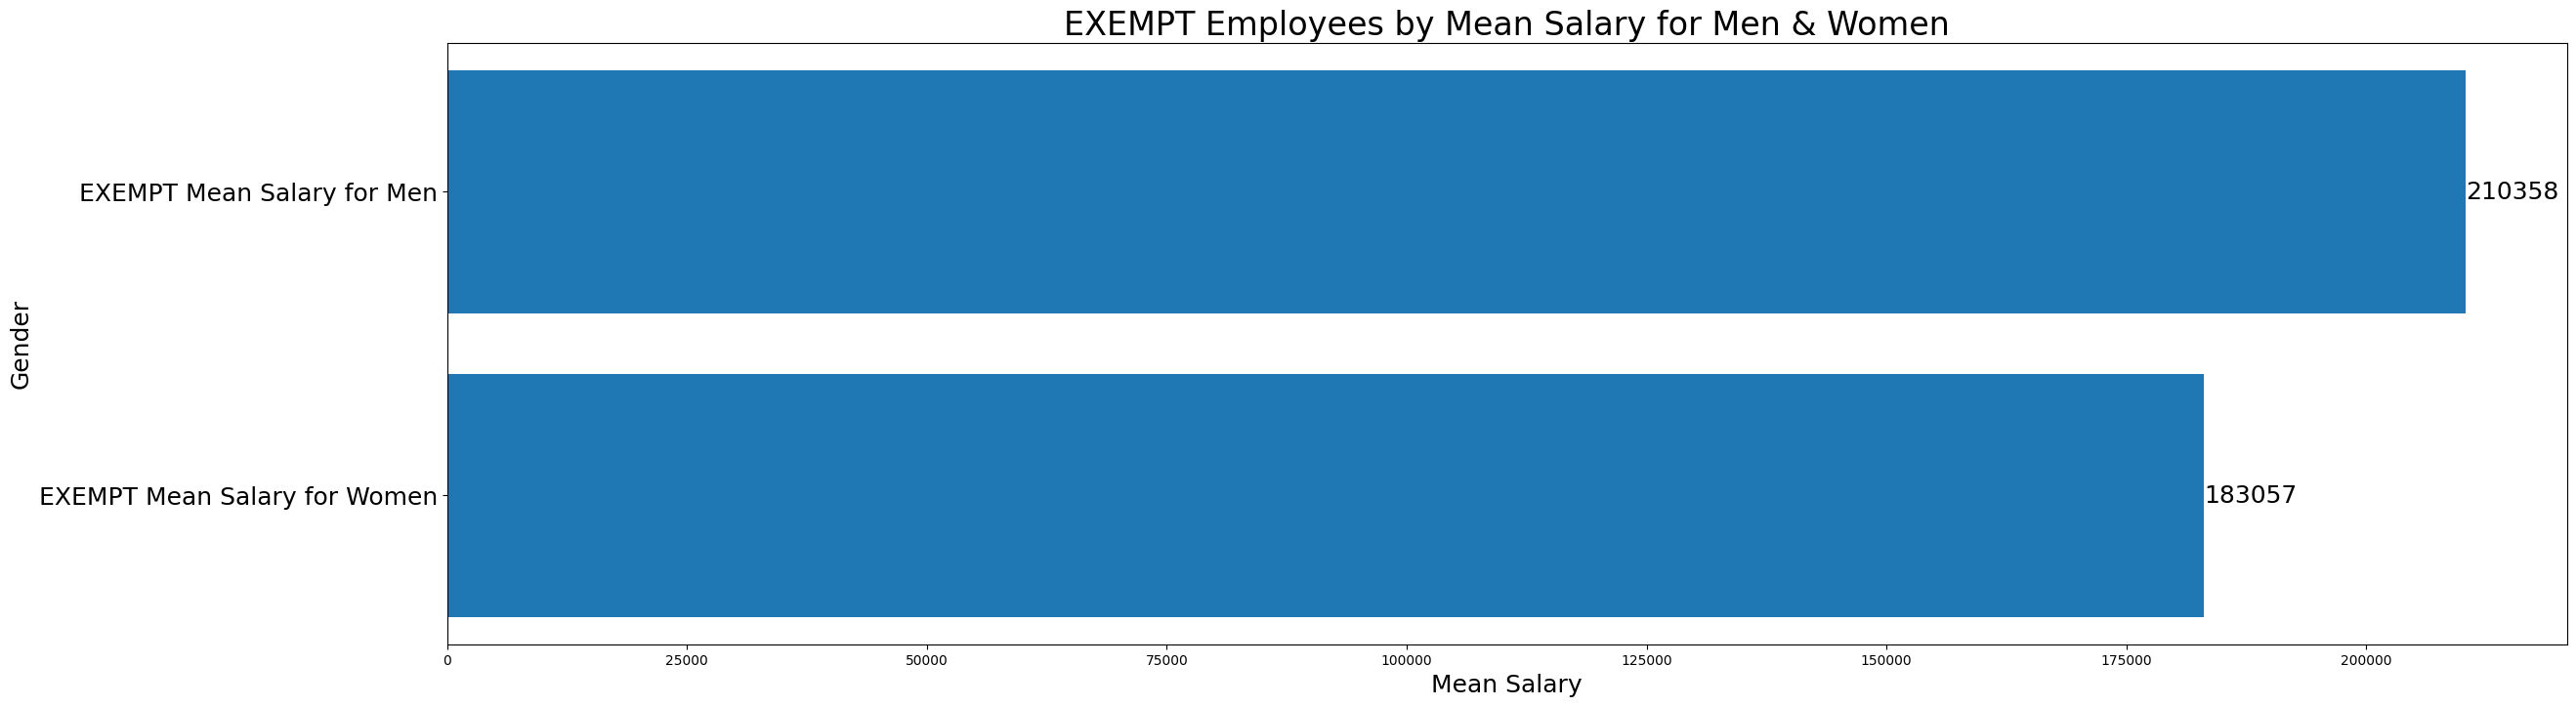

In [1404]:
male_exempt_salary = emp_data_all['Salary'][(emp_data_all['Status'] == 'EXEMPT') & (emp_data_all['gender'] == 'M')]
male_exempt_salary
male_exempt_mean_salaray = round(np.mean(male_exempt_salary), 2)
male_exempt_mean_salaray
female_exempt_salary = emp_data_all['Salary'][(emp_data_all['Status'] == 'EXEMPT') & (emp_data_all['gender'] == 'F')]
female_exempt_salary
female_exempt_mean_salaray = round(np.mean(female_exempt_salary), 2)
female_exempt_mean_salaray
y = ['EXEMPT Mean Salary for Men', 'EXEMPT Mean Salary for Women']
x = [male_exempt_mean_salaray, female_exempt_mean_salaray]
exempt_mean_salary_by_gender_df = pd.DataFrame({'Gender': y, 'Mean Salary': x})
fig_exempt_mean_salary, ax_exempt_mean_salary = plt.subplots(figsize=(28,8))
bars = ax_exempt_mean_salary.barh(y,x)
ax_exempt_mean_salary.invert_yaxis()
ax_exempt_mean_salary.set_ylabel('Gender', fontsize=18)
ax_exempt_mean_salary.set_yticklabels(y,fontsize=18)
ax_exempt_mean_salary.set_xlabel('Mean Salary', fontsize=18)
ax_exempt_mean_salary.set_title('EXEMPT Employees by Mean Salary for Men & Women', fontsize=24)
ax_exempt_mean_salary.bar_label(bars, fontsize=18)
plt.show()

10- Create a horizontal bar chart of NON-EXEMPT employees by mean salary for men and women (1 chart)

/var/folders/dr/dnghq6r96vdfqhr_t9n_5pg00000gn/T/ipykernel_7560/1921455954.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_nonexempt_mean_salary.set_yticklabels(y,fontsize=18)


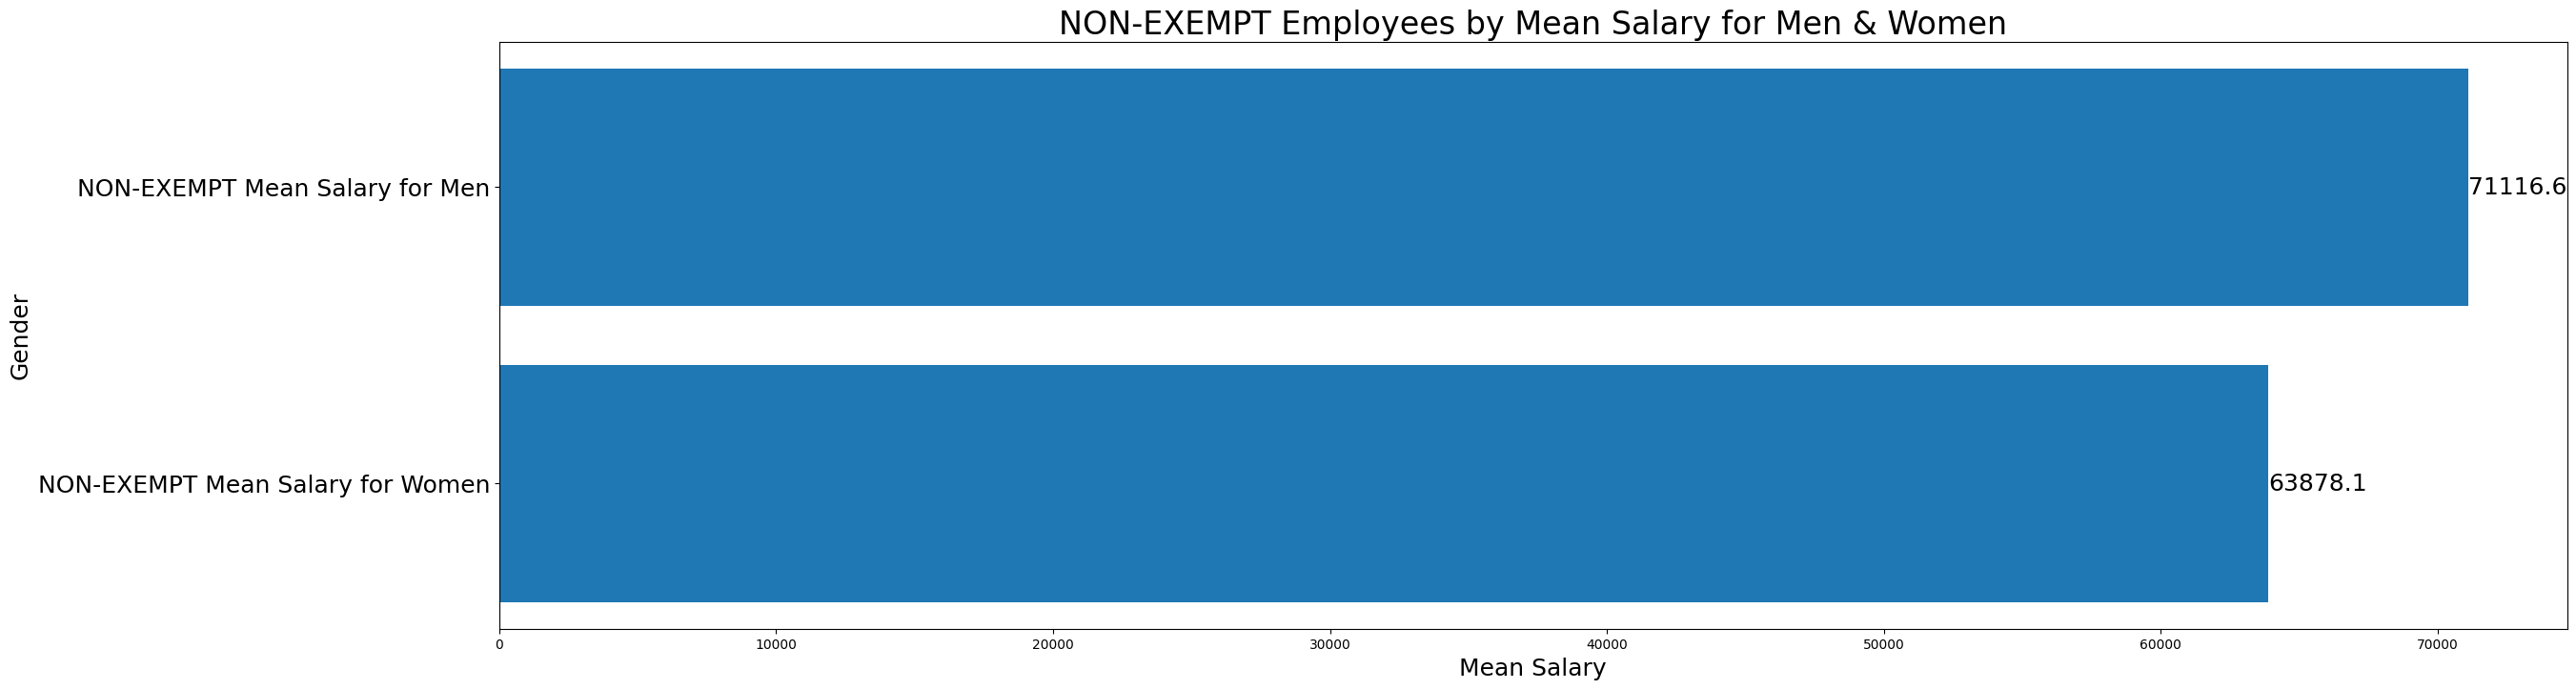

In [1405]:
male_nonexempt_salary = emp_data_all['Salary'][(emp_data_all['Status'] == 'NON-EXEMPT') & (emp_data_all['gender'] == 'M')]
male_nonexempt_salary
male_nonexempt_mean_salaray = round(np.mean(male_nonexempt_salary), 2)
male_nonexempt_mean_salaray
female_nonexempt_salary = emp_data_all['Salary'][(emp_data_all['Status'] == 'NON-EXEMPT') & (emp_data_all['gender'] == 'F')]
female_nonexempt_salary
female_nonexempt_mean_salaray = round(np.mean(female_nonexempt_salary), 2)
female_nonexempt_mean_salaray
y = ['NON-EXEMPT Mean Salary for Men', 'NON-EXEMPT Mean Salary for Women']
x = [male_nonexempt_mean_salaray, female_nonexempt_mean_salaray]
nonexempt_mean_salary_by_gender_df = pd.DataFrame({'Gender': y, 'Mean Salary': x})
fig_nonexempt_mean_salary, ax_nonexempt_mean_salary = plt.subplots(figsize=(28,8))
bars = ax_nonexempt_mean_salary.barh(y,x)
ax_nonexempt_mean_salary.invert_yaxis()
ax_nonexempt_mean_salary.set_ylabel('Gender', fontsize=18)
ax_nonexempt_mean_salary.set_yticklabels(y,fontsize=18)
ax_nonexempt_mean_salary.set_xlabel('Mean Salary', fontsize=18)
ax_nonexempt_mean_salary.set_title('NON-EXEMPT Employees by Mean Salary for Men & Women', fontsize=24)
ax_nonexempt_mean_salary.bar_label(bars, fontsize=18)
plt.show()

<h2>Part 3a - Create employee Id</h2>
To construct the employee id for everyone use the following formula<br>
First 3 letters of the last name + first 3 letters of the first name + a random 3 digit number from (001 - 999)<br>
For example the employee name is Kevin Smith id = 'SMIKEV007'<br>
In the case of people with the same last name and first name generate a new number<br>
No duplication<br>
1 - List all employees in employee id order<br>

In [1406]:
arr = np.arange(1,1000)
np.random.shuffle(arr)
arr
id_list = np.array(emp_data_all['ln'].map(lambda x: x[:3]) + emp_data_all['fn'].map(lambda x: x[:3])).tolist()
for i in range(len(id_list)):
    r_num = str(arr[i])
    if len(r_num) == 3:
        r_num = r_num
    elif len(r_num) == 2:
        r_num = '0'+r_num
    elif len(r_num) == 1:
        r_num = '00'+r_num
    id_list[i] += r_num
emp_data_all['Id'] = id_list
emp_data_all['Id'] = emp_data_all['Id'].str.upper()
emp_data_all = emp_data_all.sort_values(by=['Id'])
emp_data_all

,fn,ln,mi,gender,sg,deptCode,hiredate,termdate,Name,Salary,Status,Id
645,Raymond,Abbott,,M,7,PUB,12/28/2002,,"Abbott, Raymond",321806,EXEMPT,ABBRAY372
665,Keith,Acevedo,A,M,6,HR,5/6/2007,,"Acevedo, Keith A",173840,EXEMPT,ACEKEI954
302,Patricia,Acosta,,F,2,HR,3/5/2018,,"Acosta, Patricia",58475,NON-EXEMPT,ACOPAT738
42,Benjamin,Adams,,M,2,COMP,3/21/2015,,"Adams, Benjamin",67712,NON-EXEMPT,ADABEN275
449,Dennis,Adkins,,M,4,I.T.,5/1/2017,,"Adkins, Dennis",111088,NON-EXEMPT,ADKDEN169
...,...,...,...,...,...,...,...,...,...,...,...,...
540,Brandon,Zamora,,M,6,PROJ,10/6/2014,,"Zamora, Brandon",187062,EXEMPT,ZAMBRA288
667,Gerald,Zavala,J,M,5,PROJ,6/9/2014,,"Zavala, Gerald J",132100,EXEMPT,ZAVGER602
472,Sean,Zhang,W,M,6,PROJ,1/11/2005,6/6/2006,"Zhang, Sean W",201450,EXEMPT,ZHASEA440
379,Janice,Zimmerman,,F,5,FIN,3/2/2012,,"Zimmerman, Janice",125626,EXEMPT,ZIMJAN790


<h2>Part 3b -Raises</h2>
1 - Import the file raises_CAPSTONE.txt<br>
2 - The rules for giving a raise are in the file but be careful of the order that your run the raise<br>
3 - Based on each employees salary calculate 2 fields 'Raise_Amount' and 'New_Salary'<br>
4 - Calculate the total salary for each dept<br>
5 - Chart the total salary for each dept in 1 bar chart<br>
6 - Create a pie chart that shows the percentage that each dept has of the total money allocated for raises<br>
7 - Create a pie chart to show the percent of men vs women for the raise money allocated<br>
8 - Create a pie chart to show the percent of men vs women for the raise money allocated by dept<br>
9 - Create a dataframe for promotions.  If the persons salary excedes the salary max for their salary grade. create a column<br>
called 'Promotion' and add the string 'PROMOTION DUE' otherwise leave blank<br>


In [1407]:
raises_df = pd.read_csv('/Users/coreysteimel/code-imm-400/capstone/raises_CAPSTONE.txt', sep=',')
raises_df['raise_amt_f'] = raises_df['raise_amount'].str.replace('%', '')
raises_df['raise_amt_f'] = raises_df['raise_amt_f'].str.replace("'", "")
raises_df['raise_amt_f'] = raises_df['raise_amt_f'].astype(float) / 100
raises_df

,years,raise_amount,raise_amt_f
0,1,'3%',0.030
1,2,'3.5%',0.035
2,3,'4%',0.040
3,5,'6%',0.060
4,7,'8%',0.080
5,10,'10%',0.100


In [1408]:
emp_data_all_rm_term = emp_data_all.copy()
emp_data_all_rm_term['termdate'] = emp_data_all_rm_term['termdate'].str.strip()
index_of_termdates = emp_data_all_rm_term[ (emp_data_all_rm_term['termdate'] !=  '')].index
emp_data_all_rm_term.drop(index_termdates, inplace = True)
emp_data_all_rm_term = emp_data_all_rm_term.drop(columns=['termdate'])
emp_data_all_rm_term['YearsEmployed'] = pd.to_datetime('today').normalize() - pd.to_datetime(emp_data_all_rm_term['hiredate'])
emp_data_all_rm_term['YearsEmployed'] = round(emp_data_all_rm_term['YearsEmployed']/np.timedelta64(1,'Y'))
emp_data_all_rm_term


,fn,ln,mi,gender,sg,deptCode,hiredate,Name,Salary,Status,Id,YearsEmployed
645,Raymond,Abbott,,M,7,PUB,12/28/2002,"Abbott, Raymond",321806,EXEMPT,ABBRAY372,20.0
665,Keith,Acevedo,A,M,6,HR,5/6/2007,"Acevedo, Keith A",173840,EXEMPT,ACEKEI954,16.0
302,Patricia,Acosta,,F,2,HR,3/5/2018,"Acosta, Patricia",58475,NON-EXEMPT,ACOPAT738,5.0
42,Benjamin,Adams,,M,2,COMP,3/21/2015,"Adams, Benjamin",67712,NON-EXEMPT,ADABEN275,8.0
449,Dennis,Adkins,,M,4,I.T.,5/1/2017,"Adkins, Dennis",111088,NON-EXEMPT,ADKDEN169,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
658,Nathan,Yu,J,M,7,PUB,8/22/2013,"Yu, Nathan J",213104,EXEMPT,YUNAT450,10.0
540,Brandon,Zamora,,M,6,PROJ,10/6/2014,"Zamora, Brandon",187062,EXEMPT,ZAMBRA288,9.0
667,Gerald,Zavala,J,M,5,PROJ,6/9/2014,"Zavala, Gerald J",132100,EXEMPT,ZAVGER602,9.0
379,Janice,Zimmerman,,F,5,FIN,3/2/2012,"Zimmerman, Janice",125626,EXEMPT,ZIMJAN790,11.0


In [1409]:
def get_raise_percent(years):
    if years >= 10:
        return .1
    elif years < 10 and years >= 7:
        return .08
    elif years < 7 and years >= 5:
        return .06
    elif years < 5 and years >= 3:
        return .04
    elif years < 3 and years >= 2:
        return .035
    elif years < 2 and years >= 1:
        return .03
    else:
        return 0
    
emp_data_all_rm_term['Raise_Percent'] = emp_data_all_rm_term['YearsEmployed'].apply(get_raise_percent)
emp_data_all_rm_term

,fn,ln,mi,gender,sg,deptCode,hiredate,Name,Salary,Status,Id,YearsEmployed,Raise_Percent
645,Raymond,Abbott,,M,7,PUB,12/28/2002,"Abbott, Raymond",321806,EXEMPT,ABBRAY372,20.0,0.10
665,Keith,Acevedo,A,M,6,HR,5/6/2007,"Acevedo, Keith A",173840,EXEMPT,ACEKEI954,16.0,0.10
302,Patricia,Acosta,,F,2,HR,3/5/2018,"Acosta, Patricia",58475,NON-EXEMPT,ACOPAT738,5.0,0.06
42,Benjamin,Adams,,M,2,COMP,3/21/2015,"Adams, Benjamin",67712,NON-EXEMPT,ADABEN275,8.0,0.08
449,Dennis,Adkins,,M,4,I.T.,5/1/2017,"Adkins, Dennis",111088,NON-EXEMPT,ADKDEN169,6.0,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,Nathan,Yu,J,M,7,PUB,8/22/2013,"Yu, Nathan J",213104,EXEMPT,YUNAT450,10.0,0.10
540,Brandon,Zamora,,M,6,PROJ,10/6/2014,"Zamora, Brandon",187062,EXEMPT,ZAMBRA288,9.0,0.08
667,Gerald,Zavala,J,M,5,PROJ,6/9/2014,"Zavala, Gerald J",132100,EXEMPT,ZAVGER602,9.0,0.08
379,Janice,Zimmerman,,F,5,FIN,3/2/2012,"Zimmerman, Janice",125626,EXEMPT,ZIMJAN790,11.0,0.10


In [1410]:
emp_data_all_rm_term['Raise_Amount'] = emp_data_all_rm_term['Salary'] * emp_data_all_rm_term['Raise_Percent']
emp_data_all_rm_term

,fn,ln,mi,gender,sg,deptCode,hiredate,Name,Salary,Status,Id,YearsEmployed,Raise_Percent,Raise_Amount
645,Raymond,Abbott,,M,7,PUB,12/28/2002,"Abbott, Raymond",321806,EXEMPT,ABBRAY372,20.0,0.10,32180.60
665,Keith,Acevedo,A,M,6,HR,5/6/2007,"Acevedo, Keith A",173840,EXEMPT,ACEKEI954,16.0,0.10,17384.00
302,Patricia,Acosta,,F,2,HR,3/5/2018,"Acosta, Patricia",58475,NON-EXEMPT,ACOPAT738,5.0,0.06,3508.50
42,Benjamin,Adams,,M,2,COMP,3/21/2015,"Adams, Benjamin",67712,NON-EXEMPT,ADABEN275,8.0,0.08,5416.96
449,Dennis,Adkins,,M,4,I.T.,5/1/2017,"Adkins, Dennis",111088,NON-EXEMPT,ADKDEN169,6.0,0.06,6665.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,Nathan,Yu,J,M,7,PUB,8/22/2013,"Yu, Nathan J",213104,EXEMPT,YUNAT450,10.0,0.10,21310.40
540,Brandon,Zamora,,M,6,PROJ,10/6/2014,"Zamora, Brandon",187062,EXEMPT,ZAMBRA288,9.0,0.08,14964.96
667,Gerald,Zavala,J,M,5,PROJ,6/9/2014,"Zavala, Gerald J",132100,EXEMPT,ZAVGER602,9.0,0.08,10568.00
379,Janice,Zimmerman,,F,5,FIN,3/2/2012,"Zimmerman, Janice",125626,EXEMPT,ZIMJAN790,11.0,0.10,12562.60


In [1411]:
emp_data_all_rm_term['New_Salary'] = emp_data_all_rm_term['Salary'] + emp_data_all_rm_term['Raise_Amount']
emp_data_all_rm_term

,fn,ln,mi,gender,sg,deptCode,hiredate,Name,Salary,Status,Id,YearsEmployed,Raise_Percent,Raise_Amount,New_Salary
645,Raymond,Abbott,,M,7,PUB,12/28/2002,"Abbott, Raymond",321806,EXEMPT,ABBRAY372,20.0,0.10,32180.60,353986.60
665,Keith,Acevedo,A,M,6,HR,5/6/2007,"Acevedo, Keith A",173840,EXEMPT,ACEKEI954,16.0,0.10,17384.00,191224.00
302,Patricia,Acosta,,F,2,HR,3/5/2018,"Acosta, Patricia",58475,NON-EXEMPT,ACOPAT738,5.0,0.06,3508.50,61983.50
42,Benjamin,Adams,,M,2,COMP,3/21/2015,"Adams, Benjamin",67712,NON-EXEMPT,ADABEN275,8.0,0.08,5416.96,73128.96
449,Dennis,Adkins,,M,4,I.T.,5/1/2017,"Adkins, Dennis",111088,NON-EXEMPT,ADKDEN169,6.0,0.06,6665.28,117753.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,Nathan,Yu,J,M,7,PUB,8/22/2013,"Yu, Nathan J",213104,EXEMPT,YUNAT450,10.0,0.10,21310.40,234414.40
540,Brandon,Zamora,,M,6,PROJ,10/6/2014,"Zamora, Brandon",187062,EXEMPT,ZAMBRA288,9.0,0.08,14964.96,202026.96
667,Gerald,Zavala,J,M,5,PROJ,6/9/2014,"Zavala, Gerald J",132100,EXEMPT,ZAVGER602,9.0,0.08,10568.00,142668.00
379,Janice,Zimmerman,,F,5,FIN,3/2/2012,"Zimmerman, Janice",125626,EXEMPT,ZIMJAN790,11.0,0.10,12562.60,138188.60


In [1412]:
total_salary_by_dept = emp_data_all_rm_term.groupby(['deptCode'])['New_Salary'].sum()
total_salary_by_dept

deptCode
ACC     11919035.98
COMP    11515498.80
FIN     11688931.48
HR      12465710.94
I.T.    14779007.18
PROJ    10711098.26
PUB     10452592.14
Name: New_Salary, dtype: float64

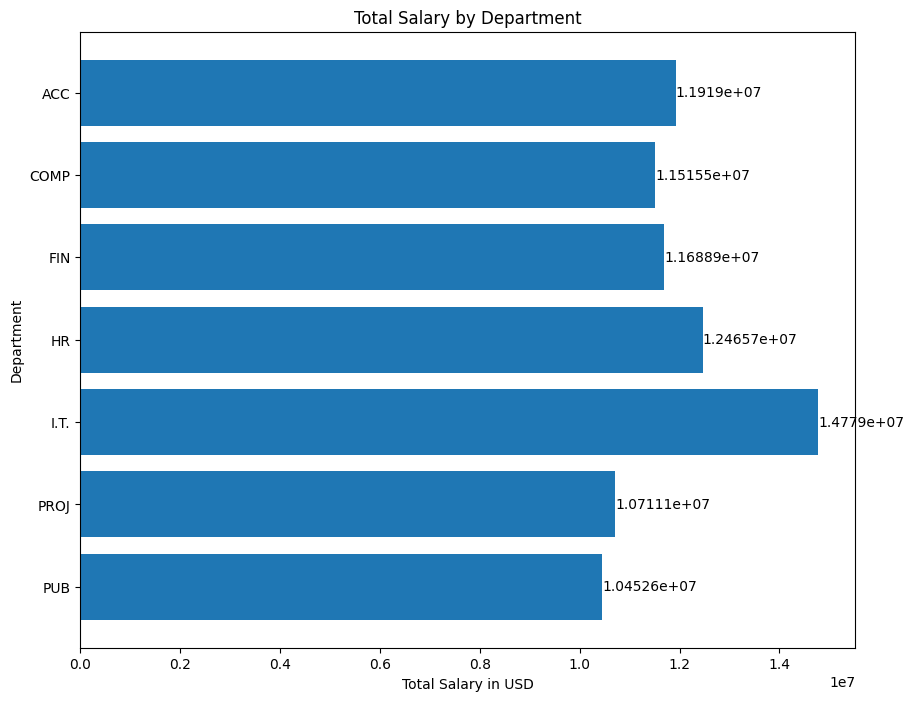

In [1413]:
y = total_salary_by_dept.keys().to_list()
x = total_salary_by_dept.tolist()
num_emp_df = pd.DataFrame({'Dept': y, 'Total_Salary': x})
fig_dept_sal, ax_dept_sal = plt.subplots(figsize=(10,8))
bars = ax_dept_sal.barh(y,x)
ax_dept_sal.invert_yaxis()
ax_dept_sal.set_ylabel('Department')
ax_dept_sal.set_xlabel('Total Salary in USD')
ax_dept_sal.set_title('Total Salary by Department')
ax_dept_sal.bar_label(bars)
plt.show()

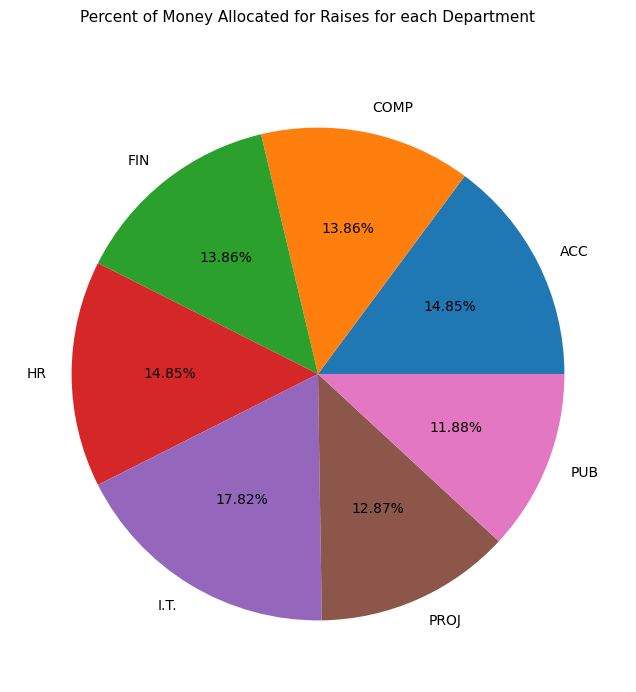

In [1414]:
raises_by_dept = emp_data_all_rm_term.groupby(['deptCode'])['Raise_Amount'].sum()
raises_by_dept
total_raise_amt = raises_by_dept.sum()
total_raise_amt
percent_raises_by_dept = []
raises_by_dept.keys().tolist()
raises_by_dept.tolist()
for amt in raises_by_dept.tolist():
    percent_raises_by_dept.append(round(amt/total_raise_amt, 2))
percent_raises_by_dept

dept_labels = raises_by_dept.keys().tolist()
fig, ax = plt.subplots(figsize=(8,8))
dept_labels
fig.suptitle("Percent of Money Allocated for Raises for each Department", fontsize=11, y=0.95)
ax = plt.subplot()
dept_percent = percent_raises_by_dept
ax.pie(dept_percent, labels=dept_labels,  autopct = '%1.2f%%')
plt.show()

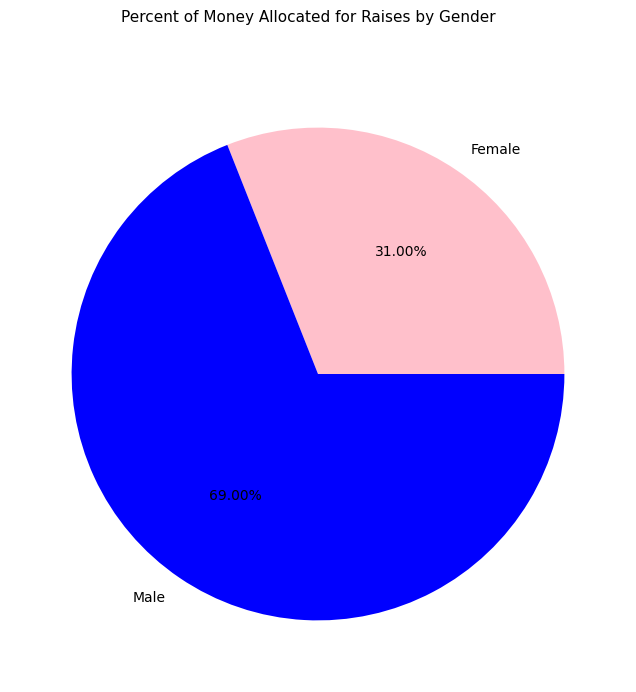

In [1415]:
raises_by_gender = emp_data_all_rm_term.groupby(['gender'])['Raise_Amount'].sum()
raises_by_gender

percent_raises_by_gender = []
raises_by_gender.keys().tolist()
raises_by_gender.tolist()
for amt in raises_by_gender.tolist():
    percent_raises_by_gender.append(round(amt/total_raise_amt, 2))
percent_raises_by_gender

gender_labels = ['Female', 'Male']
fig, ax = plt.subplots(figsize=(8,8))
gender_labels
fig.suptitle("Percent of Money Allocated for Raises by Gender", fontsize=11, y=0.95)
ax = plt.subplot()
gender_percent = percent_raises_by_gender
ax.pie(gender_percent, labels=gender_labels,  autopct = '%1.2f%%', colors=['pink', 'blue'])
plt.show()

In [1416]:
raises_by_dept_by_gender = pd.DataFrame(emp_data_all_rm_term.groupby(['deptCode','gender'])['Raise_Amount'].sum())
raises_by_dept_by_gender = raises_by_dept_by_gender.pivot_table(values='Raise_Amount', columns='gender', index='deptCode')
raises_by_dept_by_gender

gender,F,M
deptCode,,
ACC,229099.02,763517.96
COMP,279611.00,650171.80
FIN,382313.32,569233.16
HR,329311.96,689618.98
I.T.,396046.40,825815.78
PROJ,166304.18,694820.08
PUB,323934.70,509446.44


/var/folders/dr/dnghq6r96vdfqhr_t9n_5pg00000gn/T/ipykernel_7560/1031292532.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2, 4, n + 1)


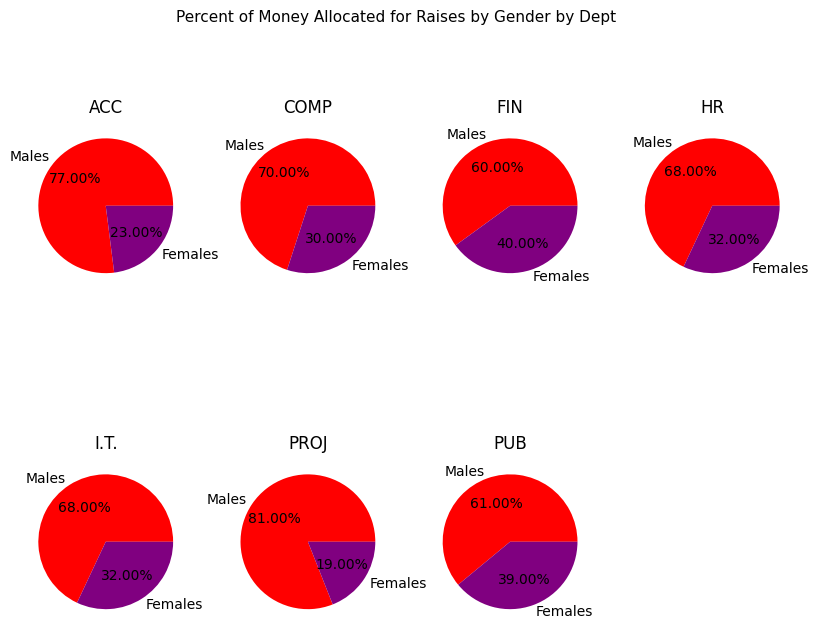

In [1417]:
dept_cats_new = raises_by_dept_by_gender.index.tolist()
dept_cats_new
raises_by_dept_by_gender['Male Percent'] = round(raises_by_dept_by_gender['M']/(raises_by_dept_by_gender['M']+raises_by_dept_by_gender['F']),2)
raises_by_dept_by_gender['Female Percent'] = round(raises_by_dept_by_gender['F']/(raises_by_dept_by_gender['M']+raises_by_dept_by_gender['F']),2)
dept_labels = ['Males', 'Females']
fig, ax = plt.subplots(figsize=(10,8))
dept_labels
fig.suptitle("Percent of Money Allocated for Raises by Gender by Dept", fontsize=11, y=0.95)
for n in range(len(raises_by_dept_by_gender)):
    ax = plt.subplot(2, 4, n + 1)
    dept_percent_by_gender = raises_by_dept_by_gender.loc[dept_cats_new[n], ['Male Percent','Female Percent']].values.flatten().tolist()
    dept_name = dept_cats_new[n]
    ax.set_title(dept_name)
    ax.pie(dept_percent_by_gender, labels=dept_labels,  autopct = '%1.2f%%', colors=['red', 'purple'])
plt.show()

In [1418]:
og_raises_df = pd.read_csv('/Users/coreysteimel/code-imm-400/capstone/raises_CAPSTONE.txt', sep=',')
og_raises_df

,years,raise_amount
0,1,'3%'
1,2,'3.5%'
2,3,'4%'
3,5,'6%'
4,7,'8%'
5,10,'10%'


Question 3b-9 States:<br><br> 
Create a dataframe for promotions.  
If the persons salary excedes the salary max for their salary grade. create a column called 'Promotion' and add the string 'PROMOTION DUE' otherwise leave blank
<br><br> 
As we can see in the dataframe above from the raises_CAPSTONE.txt file, there is no information on maximum salaries correlating to salary grades. Because the criteria, a maximum salary value correlating to each salary grade, is missing this question is not able to be evaluated nor calculated.
<br><br> 
But maybe what is meant is that we are to find the maximum salary for each salary grade from the emp_file_CAPSTONE.txt.
Then after we have those values, determine if an employees salary after the raise has been applied is greater than that value.
If yes PROMOTION DUE if no blank

In [1419]:
max_salary_by_sg = pd.DataFrame(emp_data_all_rm_term.groupby(['sg'])['Salary'].max())
max_salary_by_sg
def get_max_sg_salary(val):
    return max_salary_by_sg.loc[val]
emp_data_all_rm_term['SG_Max_Salary'] = emp_data_all_rm_term['sg'].apply(get_max_sg_salary)
def get_promotion_due(ind):
    if emp_data_all_rm_term.loc[ind]['New_Salary'] > emp_data_all_rm_term.loc[ind]['SG_Max_Salary']:
        return 'PROMOTION DUE'
    else:
        return ''
emp_data_all_rm_term['Promotion'] = emp_data_all_rm_term.index.to_series().apply(get_promotion_due)
emp_data_all_rm_term.head(50)

,fn,ln,mi,gender,sg,deptCode,hiredate,Name,Salary,Status,Id,YearsEmployed,Raise_Percent,Raise_Amount,New_Salary,SG_Max_Salary,Promotion
645,Raymond,Abbott,,M,7,PUB,12/28/2002,"Abbott, Raymond",321806,EXEMPT,ABBRAY372,20.0,0.10,32180.60,353986.60,390932,
665,Keith,Acevedo,A,M,6,HR,5/6/2007,"Acevedo, Keith A",173840,EXEMPT,ACEKEI954,16.0,0.10,17384.00,191224.00,212587,
302,Patricia,Acosta,,F,2,HR,3/5/2018,"Acosta, Patricia",58475,NON-EXEMPT,ACOPAT738,5.0,0.06,3508.50,61983.50,73281,
42,Benjamin,Adams,,M,2,COMP,3/21/2015,"Adams, Benjamin",67712,NON-EXEMPT,ADABEN275,8.0,0.08,5416.96,73128.96,73281,
449,Dennis,Adkins,,M,4,I.T.,5/1/2017,"Adkins, Dennis",111088,NON-EXEMPT,ADKDEN169,6.0,0.06,6665.28,117753.28,129566,
401,James,Aguirre,,M,3,PROJ,10/17/2016,"Aguirre, James",79153,NON-EXEMPT,AGUJAM715,6.0,0.06,4749.18,83902.18,102594,
134,Shirley,Aguilar,J,F,3,FIN,8/9/2016,"Aguilar, Shirley J",79150,NON-EXEMPT,AGUSHI311,7.0,0.08,6332.00,85482.00,102594,
118,Kimberly,Alexander,F,F,7,PUB,3/3/2005,"Alexander, Kimberly F",209208,EXEMPT,ALEKIM882,18.0,0.10,20920.80,230128.80,390932,
559,Zachary,Ali,,M,1,COMP,4/7/2018,"Ali, Zachary",30794,NON-EXEMPT,ALIZAC453,5.0,0.06,1847.64,32641.64,77582,
33,Nicholas,Allen,,M,7,I.T.,5/19/2006,"Allen, Nicholas",269589,EXEMPT,ALLNIC092,17.0,0.10,26958.90,296547.90,390932,


<h2>Part 4 - Analysis</h2>
1 - Write about any conclusions you drew from the data.
2 - Are there any additional charts or analysis you could include to bolster your conclusions

There is clearly more men than women that work for this company. Based on the Ratio of Men to Women for each Salary Grade pie charts, we can see there are more men in each salary grade. We can also see, thanks to the Ratio of Men to Women for each Department pie charts, that there are more men in each department than women. With the Number of Employees by Department horizontal bar chart, we can see that all the departments are fairly equally staffed, with the I.T. department holding the greatest number of employess. The Number of Employees by Department by Years Employed allows us to see that the vast majority of employees have been employeed between 5 and 8 years. The Histogram of Salaries shows us that All Salaries, Male Salaries, and Female Salaries are all left skewed, with the majority of employees earning less than $150,000, and that neither All Salaries nor Male nor Female Salaries fall in a normal distribution. We alse see from the Histograms of Salaries by Gender that there is really not a gender bias when it comes to salary. In line with our earlier pie charts, there are more men that are Exempt and Non-exempt at this company based on the Count of Men & Women for each Salary Status. For each scatter plot of Mean Salaries by Grade, Both Genders, Males, and Females, there is a near linear rise in mean salary amount. We can see that the mean exempt salary for men is greater than women. It would be interesting to know by what percent. Based on the graph the difference appears significant, but that could be due to scale. We can also see that the mean salary for non-exempt men is great than for women. It also appears to be statistically significant, but it could appear that way due to scale. For Total Salary by Department, because the I.T. department has the most employees, one might guess it has the most amount of the total salary, and you would be correct. All of the other deparments have relatively similar amounts of salary. We can visualize the Percent of Money Allocated for Raises for each Department, and we would suspect that the I.T. department has the most, and it does. Because there are more men that work for this company it is no surprise that men have more Percent of Money Allocated for Raises by Gender, as visualized in the pie chart, and also in the pie charts by department.

In regard to the HR complaint, it does appear that more men are hired than women. However, when women are hired there is not a statistically signficant difference in salary based on the median, as noted earlier with regard to gender bias in salary. 

What would be interesting is to see the ratio of applicants to hired employees based on gender. It seems as though there would also need to be a qualification criteria applied to this investigation to normalize the data. If one gender is statistically more qualified than the other, then it may stand to reason that this gender is hired more often. 

In regard to low wage workers, this would also require further investigation. I would imagine most of the the employees would be low wage, and there would be fewer employees in higher positions. There is usually a pyramid like hierarchical structure to most companies. What would be needed is to know what percent of salary discrepency should there be between salary grades. If we knew what the appropriate criteria for salary discrepency was between salary grades, we could then determine if there was in fact statistically significant discrimination against low wage workers. 

This notebook is part of a course at www.codeimmersives.com called Data Science. If you accessed this notebook outside the course, you can get more information about this course online by clicking here.

<hr>

Copyright &copy; 2021  Code Immersives